# GCN in a transductive setting for Node betweenness
This notebook shows how a GCN/GraphSAGE model is trained to compute Node betweenness centrality on different graphs

# 1. Codebase

In [85]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, GCNConv, ChebConv
import torch.nn as nn
import traceback
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

class MyNet():

    def __str__(self):
        #print(dir(self))
        #print()
        #print([attr+"-"+str(getattr(self,attr)) for attr in dir(self) if attr.startswith("d")])
        hp = [attr+"="+str(getattr(self,attr)) for attr in dir(self) if (attr.startswith("d") and len(attr)==2) or attr.startswith("num_layers") ]
        hp = "_".join(hp)
        return "%s-%s" % (self.__class__.__name__,hp)
        #return "%s-gcn(%d,%d)-gcn(%d,%d)" % (self.__class__.__name__,dataset.num_features,self.d1,self.d1,
        #                                       dataset.num_classes)
        
        
class Net1(torch.nn.Module, MyNet):
    def __init__(self, d1=16,num_features=1, num_classes=1):
        super(Net1, self).__init__()
        self.conv1 = GCNConv(num_features, d1)
        self.conv2 = GCNConv(d1, num_classes)
        self.d1 = d1
        

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        # output as multiclass target
        #return F.log_softmax(x, dim=1)
        
        # output as regression target
        return x
    


    
class Net2(torch.nn.Module, MyNet):
    def __init__(self, d1=300,d2=100,num_features=1, num_classes=1):
        super(Net2, self).__init__()
        self.conv1 = GCNConv(num_features, d1 )
        #self.conv2 = GCNConv(16, dataset.num_classes)
        self.fc1 = nn.Linear(d1, d2)
        self.fc2 = nn.Linear(d2, num_features)
        self.d1 = d1
        self.d2 = d2

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        # 2 fc layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        # output as regression target
        return x
        
    
    #def __str__(self):
    #    return "%s-gcn(%d,%d)-fc(%d,%d)-fc(%d,%d)" % (self.__class__.__name__,dataset.num_features,self.d1,self.d1,
    #                                                    self.d2,self.d2,
    #                                                    dataset.num_features)

    
    
class Net3(torch.nn.Module, MyNet):
    def __init__(self, d1=300,d2=100,num_features=1, num_classes=1):
        super(Net3, self).__init__()
        self.conv1 = SAGEConv(num_features, d1 )
        #self.conv2 = SAGEConv(16, dataset.num_classes)
        self.fc1 = nn.Linear(d1, d2)
        self.fc2 = nn.Linear(d2, num_features)
        self.d1 = d1
        self.d2 = d2
        
        self.num_features = num_features
        self.num_classes = num_classes
        
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        # 2 fc layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        # output as regression target
        return x
        
    def __str__(self):
        return "Net3-SAGEgcn(%d,%d)-fc(%d,%d)-fc(%d,%d)" % (self.num_features,self.d1,self.d1,
                                                        self.d2,self.d2,
                                                        self.num_features)

class Net4(torch.nn.Module, MyNet):
    def __init__(self, d1=300,d2=100,d3=10,num_features=1, num_classes=1):
        super(Net4, self).__init__()
        self.conv1 = GCNConv(num_features, d1 )
        self.conv2 = GCNConv(d1, d2)
        self.fc1 = nn.Linear(d2, d3)
        self.fc2 = nn.Linear(d3, num_features)
        self.d1 = d1
        self.d2 = d2
        self.d3 = d3

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        # 2 fc layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        # output as regression target
        return x
        
    #def __str__(self):
    #    return "Net4-gcn(%d,%d)-fc(%d,%d)-fc(%d,%d)" % (dataset.num_features,self.d1,self.d1,
    #                                                    self.d2,self.d2,
    #                                                    dataset.num_features)

    
class Net5(torch.nn.Module, MyNet):
    def __init__(self, d1=90,d2=80,d3=50,d4=20,num_features=1, num_classes=1):
        super(Net5, self).__init__()
        self.conv1 = GCNConv(num_features, d1 )
        self.conv2 = GCNConv(d1, d2)
        self.fc1 = nn.Linear(d2, d3)
        self.fc2 = nn.Linear(d3, d4)
        self.fc3 = nn.Linear(d4, num_features)
        self.d1 = d1
        self.d2 = d2
        self.d3 = d3
        self.d4 = d4
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        # 3 fc layers
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        # output as regression target
        return x
        
    #def __str__(self):
    #    #print(dir(self))
    #    #print()
    #    #print([attr+"-"+str(getattr(self,attr)) for attr in dir(self)])
    #    return "Net5-gcn(%d,%d)-fc(%d,%d)-fc(%d,%d)" % (dataset.num_features,self.d1,self.d1,
    #                                                   self.d2,self.d2,
    #                                                    dataset.num_features)

    
class Net6(torch.nn.Module, MyNet):
    def __init__(self, d1=90,d2=80,d3=50,num_features=1, num_classes=1, num_layers=4):
        super(Net6, self).__init__()
        self.conv1 = ChebConv(num_features, d1 ,3)
        self.convs = torch.nn.ModuleList()
        for i in range(num_layers - 1):
            self.convs.append(ChebConv(d1, d1 ,3))
        self.fc1 = nn.Linear(d1, d2)
        self.fc2 = nn.Linear(d2, d3)
        self.fc3 = nn.Linear(d3, num_features)
        self.num_layers = num_layers
        self.d1 = d1
        self.d2 = d2
        self.d3 = d3

        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        for conv in self.convs:
            x = F.relu(conv(x, edge_index))
            x = F.dropout(x, training=self.training)
        # 3 fc layers
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        # output as regression target
        return x
    
    
class Net7(torch.nn.Module, MyNet):
    def __init__(self, d1=90,d2=80,d3=50,num_features=1, num_classes=1, num_layers=4):
        super(Net7, self).__init__()
        self.conv1 = SAGEConv(num_features, d1 )
        self.convs = torch.nn.ModuleList()
        for i in range(num_layers - 1):
            self.convs.append(GCNConv(d1, d1 ))
        self.fc1 = nn.Linear(d1, d2)
        self.fc2 = nn.Linear(d2, d3)
        self.fc3 = nn.Linear(d3, num_features)
        self.num_layers = num_layers
        self.d1 = d1
        self.d2 = d2
        self.d3 = d3

        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        for conv in self.convs:
            x = F.relu(conv(x, edge_index))
            x = F.dropout(x, training=self.training)
        # 3 fc layers
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        # output as regression target
        return x
    
    
class Net8(torch.nn.Module, MyNet):
    def __init__(self, d1=15,d2=50,d3=20,d4=20,d5=20,d6=20,num_features=1, num_classes=1, num_layers=2):
        super(Net8, self).__init__()
        self.conv1 = GCNConv(num_features, d1 )
        self.convs = torch.nn.ModuleList()
        for i in range(num_layers - 1):
            self.convs.append(GCNConv(d1, d1 ))
        self.fc1 = nn.Linear(d1, d2)
        self.fc2 = nn.Linear(d2, d3)
        self.fc3 = nn.Linear(d3, d4)
        self.fc4 = nn.Linear(d4, d5)
        self.fc5 = nn.Linear(d5, d6)
        self.fc6 = nn.Linear(d6, num_features)
        self.num_layers = num_layers
        self.d1 = d1
        self.d2 = d2
        self.d3 = d3
        self.d4 = d4
        self.d5 = d5
        self.d6 = d6

        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        for conv in self.convs:
            x = F.relu(conv(x, edge_index))
        x = F.dropout(x, training=self.training)
        # 3 fc layers
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc5(x))
        x = self.fc6(x)

        # output as regression target
        return x
    

In [86]:
import networkx as nx
import time
import torch
from torch_geometric.data import DataLoader
import importlib
import torch
from torch_geometric.data import DataLoader
import networkx as nx
from torch_geometric.data import Data
import pickle
import math
import pandas as pd
from IPython.display import display, HTML
import os



def loadDataset(collection, name=None):
    try:
        # import datasets
        themodule = importlib.import_module("torch_geometric.datasets")
        # get the function corresponding to collection
        method_to_call = getattr(themodule, collection)
        if name:
            dataset = method_to_call(root='./data/'+str(collection), name=name)
            dataset.filename = name
            return dataset
        else:
            return method_to_call(root='./data/'+str(collection)) 
    except:
        # custom module
        method_to_call = globals()[collection]
       
        if name:
            
            dataset = method_to_call(root='./data/'+str(collection), name=name)
            dataset.filename = name
            return dataset
        else:
            return method_to_call(root='./data/'+str(collection)) 
        
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

def transformMask(mask):
    train_mask = []
    i = 0
    for pick in mask:
        if pick[0]==1:
            train_mask.append(i)
        i+=1
    return train_mask


def shuffleTrainTestMasks(data, trainpct = 0.7):
    ysize = list(data.y.size())[0]
    data.train_mask = torch.zeros(ysize,1, dtype=torch.long)
    data.train_mask[int(ysize*trainpct):] = 1
    data.train_mask = data.train_mask[torch.randperm(ysize)]
    data.test_mask = torch.ones(ysize,1, dtype=torch.long) - data.train_mask
    
    data.train_mask = transformMask(data.train_mask)
    data.test_mask = transformMask(data.test_mask)
  

def shuffleTrainTestValMasks(data, trainpct = 0.7, valpct = 0.2):
    
 
    ysize = list(data.y.size())[0]
    #print("total ", ysize)
    #print(" train ",int(ysize*trainpct)-int(ysize*trainpct*valpct))
    #print(" val ",int(ysize*trainpct*valpct))
    #print(" test ",int(ysize*(1- trainpct) ))
    data.train_mask = torch.zeros(ysize,1, dtype=torch.long)
    data.train_mask[:int(ysize*trainpct)] = 1
    data.train_mask = data.train_mask[torch.randperm(ysize)]
    #print(" train sum ",data.train_mask.sum())
    data.test_mask = torch.ones(ysize,1, dtype=torch.long) - data.train_mask
    #print(" test sum ",data.test_mask.sum())
    
    # transform to list of indexes
    data.train_mask = transformMask(data.train_mask)
    data.test_mask = transformMask(data.test_mask)
    
    data.val_mask = data.train_mask[:int(ysize*trainpct*valpct)]
    data.train_mask = data.train_mask[int(ysize*trainpct*valpct):]

    
    #print(data.train_mask)
    #print(data.val_mask)
    #print(data.test_mask)
    
    

def trainTestEval(dataset, epochs=1, batch_size=32, res_dict={}, seed=999):
    global Net
    
    torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
   
    
    loader = DataLoader(dataset,  shuffle=False)
    i = 0
    #print(loader)
    #print(dir(loader))
    
    G = dataset.data
    try:
    
        #print(G)
        start = time.time()


        # 1.  prepare model
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        #print("using ",device)
        model = Net.to(device)  
        data = G.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
        model.train()

        # 2.  create a train_mask, and a test_mask (val_mask for further experiments)
        #shuffleTrainTestMasks(data)
        #shuffleTrainTestValMasks(data)
        shuffleTrainTestMasks(data)

        # 3. train some epochs
        for epoch in range(epochs):
            optimizer.zero_grad()
            out = model(data)
            loss = F.mse_loss(out[data.train_mask], data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            if epoch % 25 == 0 :
                print("epoch-loss: ",epoch, loss)

        # 4. Model evaluation
        model.eval()
        #  classification in a multiclass setting
        #_, pred = model(data).max(dim=1)
        #correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
        #acc = correct / data.test_mask.sum().item()
        #print('Accuracy: {:.4f}'.format(acc))


        # regression 
        pred = model(data)
        #print("target: ",data.y[data.test_mask])
        #print("prediction: ",pred[data.test_mask])
        #print(pred[data.test_mask].type())
        #print(data.y[data.test_mask].type())

        # prepare the normalized mean root squared error
        t = data.y[data.test_mask]
        y = pred[data.test_mask]
        negatives = False
        if 0 > (sum(y<0)):
            negatives = True
        nrmse = torch.sum((t - y) ** 2)/len(data.test_mask)
        nrmse = nrmse.sqrt()
        #print("RMSE: ",nrmse)

        m = torch.mean(t).item()
        m2 = torch.mean(y).item()
        med = torch.median(t).item()
        med2 = torch.median(y).item()
        #print("mean",m)
        tmax = torch.max(t).item()
        tmax2 = torch.max(y).item()
        tmin = torch.min(t).item()
        tmin2 = torch.min(y).item()
        sd = tmax-tmin
        sd = sd
        sd2 = tmax2-tmin2
        sd2 = sd2
        #print("sd",sd)
        #nrmse = (nrmse - m)/sd
        #print("NRMSE:",nrmse)


        endtime = time.time()
        #print("Total train-test time: "+str(endtime-start))

        # getting model hyper params
        hyperparams = ""
        
        model_ds = [elem+"="+str(getattr(Net, elem)) for elem in dir(Net) if elem.startswith("num_layers") or (elem.startswith("d") and len(elem)==2)]
        hyperparams = "_".join(model_ds)
        theepochs = "epochs="+str(epochs)
        #dataset name
        thedataset = dataset.filename
        # basename
        thedataset = os.path.basename(thedataset)
        # extension
        thedataset = os.path.splitext(thedataset)[0]

        result = str(model)+" " \
                +hyperparams+" " \
                +theepochs+" " \
                +str(thedataset)+" " \
                +"nrmse="+str(round_half_up(nrmse.item(),3))+" " \
                +"time="+str(round_half_up(endtime-start,3) )  \
                +" negatives?"+str(negatives) \
                +"\n"
                
        res_dict['tables'][str(model)]={
                                #"model": str(model),
                                 "hyperparams": hyperparams,
                                 "dataset": str(thedataset),
                                 "epochs": epochs,
                                 "nrmse":round_half_up(nrmse.item(),3),
                                 "time":round_half_up(endtime-start,3),
                                "neg vals": negatives,
                                #"GTavg": m,
                                #"PREDavg": m2,
                                #"GTmed": med,
                                #"PREDmed": med2,
                                #"GTmin": tmin,
                                #"PREDmin": tmin2,
                                "GTmax": tmax,
                                "PREDmax": tmax2,
                                #"GTsd": sd,
                                #"PREDsd": sd2,

                                }
        res_dict['scatterplots'][str(model)]={
            'predictions': y.to('cpu').detach().numpy(),
            'targets': t.to('cpu').detach().numpy(),
        }

        with open("results.txt","a") as f:
            #print(dir(dataset))
            #f.write("\n")
            #print(result)
            f.write(result)

        model.to('cpu')  
        data.to('cpu')
        del data
        del model
        torch.cuda.empty_cache()


        #i+=1
        #if i==1:
        #    break
    except Exception as err:
        traceback.print_exc()
        model.to('cpu')  
        G.to('cpu')
        del G
        del model
        torch.cuda.empty_cache()
    

In [87]:
def reporting_old(d):
    df_original = pd.DataFrame(d['tables'])
    df = df_original.T
    #df.style.set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])
    # Assuming that dataframes df1 and df2 are already defined:
    display(df)
    #display(HTML(df.to_html()))
    #print(df)

In [88]:
def reporting(res_dict):
    df_original = pd.DataFrame(res_dict['tables'])
    df = df_original.T
    #df.style.set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])
    # Assuming that dataframes df1 and df2 are already defined:
    display(df)
    #display(HTML(df.to_html()))
    #print(df)
    
    #now scatter plot for each model (use a grid)
    sp = res_dict['scatterplots']
    tbs = res_dict['tables']
    
    # find best model 
    min_nrmse=1000
    best_model = ''
    for name,trainres in tbs.items():
        if trainres['nrmse']<min_nrmse:
            min_nrmse=trainres['nrmse']
            best_model=name
            
            
    # make a grid
    #N = len(sp.keys())
    #cols = 3
    #rows = int(math.ceil(N / cols))

    #gs = gridspec.GridSpec(rows, cols)
    gs = gridspec.GridSpec(1, 2) # scatter and 2 boxplots
    fig=plt.figure(figsize=(16, 8), dpi= 60, facecolor='w', edgecolor='k')
    n = 0
    for name,trainres in sp.items():
        
        if name != best_model:
            continue
        
        # subplots - scatterplot
        ax = fig.add_subplot(gs[n])
        n+=1
        
        newt = np.array(trainres['targets'])
        newy = np.array(trainres['predictions'])
        
        ax.plot(newt, newy,'o', color='black')
        plt.xlabel('target')
        plt.ylabel('prediction');
        ax.plot(newt, newt, color = 'red', linewidth = 2)
        # ranges
        #ax.xlim(0, 1)
        #ax.ylim(0, 1)
        # title
        ax.set_title(name)
        
        # subplots - boxplot
        ax = fig.add_subplot(gs[n])
        n+=1
        newy.shape = newt.shape
        ax.boxplot([newt,newy])
        ax.set_title(name)
        

        
    #fig.suptitle('Scatter plots') # or plt.suptitle('Main title')
    fig.tight_layout()

In [89]:
class MyOwnDataset2():
    def __init__(self,  root, name, transform=None, pre_transform=None):
        f = open(name, 'rb')
        self.data = pickle.load(f) 
        #print(self.data.num_features)
        self.num_features = self.data.num_features
        self.num_classes = 1
        f.close()
        
        

In [90]:
  
    
    
    dataset = loadDataset(
        collection='MyOwnDataset2', 
        name=dname)
    Net=Net8(d1=d1,d2=d2,d3=d3,
             num_layers=nlayers,
             d4=d4,d5=50,d6=25,
             num_features=dataset.num_features, num_classes=dataset.num_classes)
    trainTestEval(dataset,  epochs=epochs, res_dict=res_dict,seed=seed)
    del Net
    del dataset
    torch.cuda.empty_cache()
    
    

NameError: name 'd1' is not defined

In [91]:
def experimentBlock(dname, epochs=2, seed=35,nlayers=2,d1=15,d2=50,d3=20,d4=50):
    global Net
    
    
    dataset = loadDataset(
        collection='MyOwnDataset2', 
        name=dname)
    Net=Net6(d1=d1,d2=d2,d3=d3,
             num_layers=nlayers,
             num_features=dataset.num_features, num_classes=dataset.num_classes)
    trainTestEval(dataset,  epochs=epochs, res_dict=res_dict, seed=seed)
    del Net
    del dataset
    torch.cuda.empty_cache()
    
  

In [92]:
res_dict={'tables':{}, 'scatterplots':{}}

epoch-loss:  0 tensor(0.0902, device='cuda:0', grad_fn=<MseLossBackward>)


/home/pau/.pyenv/versions/3.6.7/envs/gnn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:132: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.145247,0.062318,KarateClub_1_nd,2,d1=15_d2=50_d3=20_num_layers=2,False,0.262,0.02


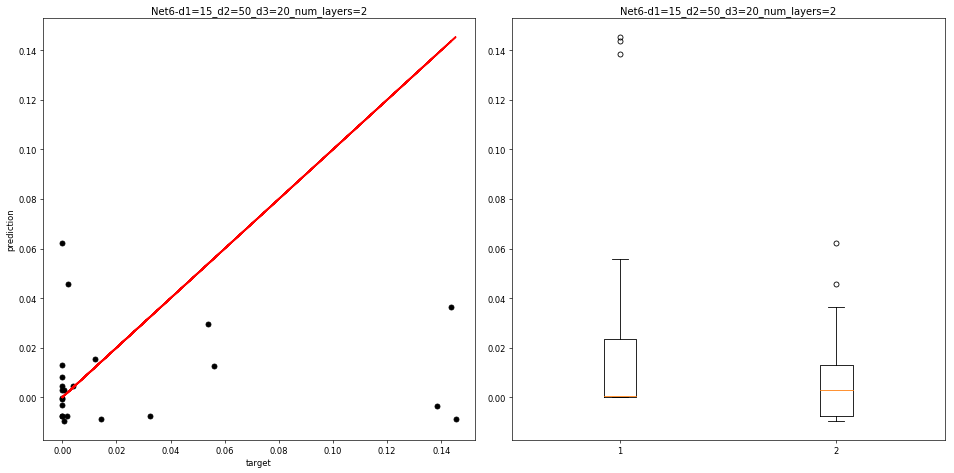

In [48]:
dname='../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_nd.pickle'
experimentBlock(dname, epochs=2, seed=35, nlayers=2,d1=15,d2=50,d3=20,d4=50)
reporting(res_dict)

/home/pau/.pyenv/versions/3.6.7/envs/gnn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:132: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


epoch-loss:  0 tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  25 tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  50 tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  75 tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  100 tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  125 tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  150 tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  175 tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=1300_d2=90_d3=80_num_layers=1,0.145247,0.0808276,KarateClub_1_nd,200,d1=1300_d2=90_d3=80_num_layers=1,False,0.348,0.765


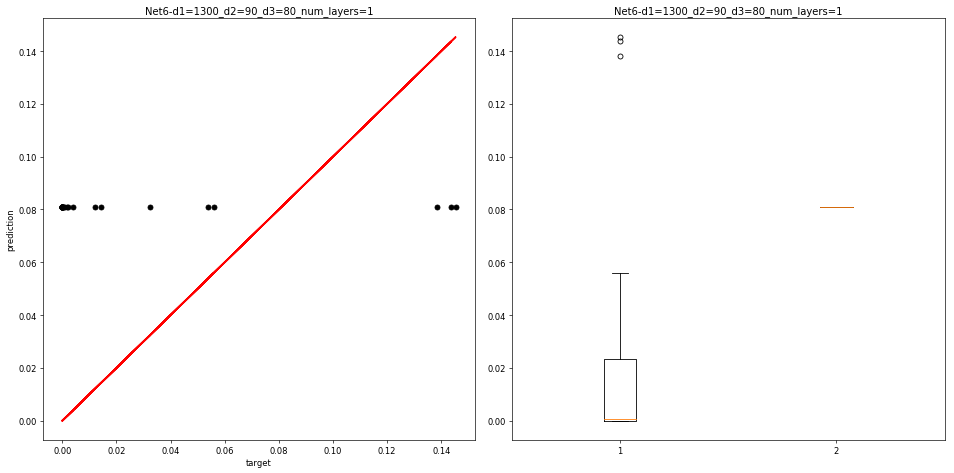

In [134]:
res_dict={'tables':{}, 'scatterplots':{}}
dname='../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_nd.pickle'
experimentBlock(dname, epochs=200, seed=35, nlayers=1,d1=1300,d2=90,d3=80,d4=60)
reporting(res_dict)

NO matter how big the capacity it goes into a constancnt value at 0.08...

0


/home/pau/.pyenv/versions/3.6.7/envs/gnn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:132: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


epoch-loss:  0 tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.100592,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.448,4.931
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0954475,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.449,0.023


1
epoch-loss:  0 tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0198591,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.646,0.028
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.041897,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.52,0.036


2
epoch-loss:  0 tensor(0.0108, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0048, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0570488,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.547,0.019
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.00110374,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.597,0.025


3
epoch-loss:  0 tensor(0.0425, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0606, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0330702,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.662,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.012971,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.538,0.024


4
epoch-loss:  0 tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0665653,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.514,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0662332,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.517,0.024


5
epoch-loss:  0 tensor(0.0040, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0050, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0199539,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.539,0.031
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0184814,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.53,0.037


6
epoch-loss:  0 tensor(0.0609, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0560559,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.8,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0022293,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.571,0.033


7
epoch-loss:  0 tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0894878,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.511,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0940785,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.531,0.024


8
epoch-loss:  0 tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0543457,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.356,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0926635,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.433,0.028


9
epoch-loss:  0 tensor(0.0435, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.017233,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.546,0.029
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.00833055,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.56,0.028


10
epoch-loss:  0 tensor(0.0049, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0105, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.037901,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.52,0.024
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0373182,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.52,0.027


11
epoch-loss:  0 tensor(0.0468, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.061531,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.864,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0195834,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.543,0.024


12
epoch-loss:  0 tensor(0.1149, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.148269,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.494,0.019
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0616358,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.356,0.03


13
epoch-loss:  0 tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0874512,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.519,0.028
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.112106,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.561,0.025


14
epoch-loss:  0 tensor(0.0102, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,1.09039e-05,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.601,0.019
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.0342429,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.691,0.023


15
epoch-loss:  0 tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0430402,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.54,0.019
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0762309,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.525,0.023


16
epoch-loss:  0 tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0561, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.00249848,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.566,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.122687,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.608,0.026


17
epoch-loss:  0 tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0432, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0657033,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.372,0.023
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.117259,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.515,0.029


18
epoch-loss:  0 tensor(0.0470, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0725095,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.521,0.027
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0265614,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.532,0.036


19
epoch-loss:  0 tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0109, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0813252,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.475,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0492093,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.448,0.026


20
epoch-loss:  0 tensor(0.0046, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0467, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0426807,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.52,0.028
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.0289993,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.65,0.028


21
epoch-loss:  0 tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0127, device='cuda:0', grad_fn=<MseLossBackward>)


/home/pau/.pyenv/versions/3.6.7/envs/gnn-pytorch/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0270056,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.654,0.019
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0163409,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.547,0.024


22
epoch-loss:  0 tensor(0.0467, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.000733152,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.616,0.019
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.0206412,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.65,0.023


23
epoch-loss:  0 tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.145247,0.105494,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.436,0.022
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.145247,0.107547,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.445,0.036


24
epoch-loss:  0 tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0434406,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.699,0.025
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0164808,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.531,0.028


25
epoch-loss:  0 tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0431, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0204453,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.547,0.036
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0259603,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.533,0.031


26
epoch-loss:  0 tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0754168,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.373,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0966756,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.442,0.031


27
epoch-loss:  0 tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.145247,0.126505,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.489,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.145247,0.090345,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.378,0.03


28
epoch-loss:  0 tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0436, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.00585854,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.499,0.023
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0701651,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.471,0.028


29
epoch-loss:  0 tensor(0.0831, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0796742,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.359,0.024
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0869574,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.42,0.027


30
epoch-loss:  0 tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0033, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0453683,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.749,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.0103093,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.62,0.032


31
epoch-loss:  0 tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0792, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0708373,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.387,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.184602,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.805,0.024


32
epoch-loss:  0 tensor(0.0117, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.048825,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.447,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.059738,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.453,0.024


33
epoch-loss:  0 tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0366838,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.45,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0577569,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.457,0.026


34
epoch-loss:  0 tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.13764,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.548,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0428216,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.448,0.03


35
epoch-loss:  0 tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.145247,0.0562989,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.266,0.026
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.145247,0.0453731,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.246,0.035


36
epoch-loss:  0 tensor(0.0739, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0764, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.138886,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.397,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.162119,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.655,0.027


37
epoch-loss:  0 tensor(0.0044, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0028, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0258851,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.532,0.025
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0136312,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.55,0.034


38
epoch-loss:  0 tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0748708,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.457,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.122966,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.591,0.027


39
epoch-loss:  0 tensor(0.0475, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.00994729,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.482,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.133904,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.62,0.026


40
epoch-loss:  0 tensor(0.0492, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.077315,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.367,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0727138,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.366,0.025


41
epoch-loss:  0 tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0371, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.10004,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.441,0.022
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.099885,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.441,0.039


42
epoch-loss:  0 tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.145247,0.078922,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.287,0.023
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.145247,0.0780314,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.327,0.035


43
epoch-loss:  0 tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0927354,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.447,0.022
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0820736,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.414,0.029


44
epoch-loss:  0 tensor(0.0243, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0893087,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.413,0.022
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0497166,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.357,0.035


45
epoch-loss:  0 tensor(0.0296, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0202543,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.353,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0447995,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.337,0.028


46
epoch-loss:  0 tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.143657,0.08198,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.331,0.023
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.143657,0.0548615,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.247,0.03


47
epoch-loss:  0 tensor(0.1161, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0798447,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.786,0.026
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.00594709,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.497,0.041


48
epoch-loss:  0 tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0756126,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.509,0.023
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0710978,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.517,0.033


49
epoch-loss:  0 tensor(0.0377, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0399503,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.476,0.023
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0717624,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.475,0.03


50
epoch-loss:  0 tensor(0.0102, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.000492379,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.626,0.036
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0178809,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.558,0.036


51
epoch-loss:  0 tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0852, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.112688,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.475,0.03
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0358938,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.336,0.034


52
epoch-loss:  0 tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0208, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0616194,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.456,0.022
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0703093,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.47,0.033


53
epoch-loss:  0 tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0070, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0723119,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.523,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0339677,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.525,0.025


54
epoch-loss:  0 tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0070, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.094155,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.548,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0452556,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.521,0.025


55
epoch-loss:  0 tensor(0.0083, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0092, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0698,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.514,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.068869,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.516,0.032


56
epoch-loss:  0 tensor(0.0076, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0427, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0629447,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.519,0.034
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.0233424,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.631,0.028


57
epoch-loss:  0 tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.00327343,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.571,0.032
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0987908,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.559,0.037


58
epoch-loss:  0 tensor(0.0392, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0861, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.145247,0.137818,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.54,0.019
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.145247,0.130612,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.552,0.025


59
epoch-loss:  0 tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0471579,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.735,0.025
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0634421,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.525,0.039


60
epoch-loss:  0 tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0249304,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.535,0.027
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0268654,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.531,0.041


61
epoch-loss:  0 tensor(0.0845, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.110112,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.464,0.028
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0150518,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.467,0.033


62
epoch-loss:  0 tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.04229,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.334,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0190516,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.347,0.027


63
epoch-loss:  0 tensor(0.0595, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0547, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.141435,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.528,0.019
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.113853,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.544,0.031


64
epoch-loss:  0 tensor(0.0577, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.230405,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.717,0.031
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.10455,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.539,0.034


65
epoch-loss:  0 tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0791, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0420906,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.338,0.026
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.120325,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.525,0.038


66
epoch-loss:  0 tensor(0.0077, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0059, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.00898715,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.628,0.022
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0164671,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.558,0.027


67
epoch-loss:  0 tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0500743,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.461,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0741136,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.481,0.024


68
epoch-loss:  0 tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0164294,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.573,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.113545,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.556,0.025


69
epoch-loss:  0 tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0301105,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.53,0.022
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.047149,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.516,0.025


70
epoch-loss:  0 tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0811, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0650125,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.359,0.022
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.167622,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.707,0.024


71
epoch-loss:  0 tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0905, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0839178,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.408,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.214486,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.865,0.024


72
epoch-loss:  0 tensor(0.0046, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0527743,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.516,0.034
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0445131,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.518,0.032


73
epoch-loss:  0 tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0084, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0957075,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.475,0.036
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0140627,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.468,0.038


74
epoch-loss:  0 tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.00489114,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.618,0.031
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.0162296,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.638,0.033


75
epoch-loss:  0 tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0236303,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.624,0.031
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0660235,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.517,0.038


76
epoch-loss:  0 tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0730031,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.384,0.024
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0642066,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.369,0.031


77
epoch-loss:  0 tensor(0.0709, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0456414,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.477,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0415289,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.462,0.03


78
epoch-loss:  0 tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0904, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0611186,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.356,0.02
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.124111,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.494,0.032


79
epoch-loss:  0 tensor(0.0071, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.00183203,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.56,0.034
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0282906,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.518,0.037


80
epoch-loss:  0 tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0891624,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.52,0.031
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0412951,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.526,0.031


81
epoch-loss:  0 tensor(0.0466, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.200561,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.678,0.023
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0771233,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.475,0.037


82
epoch-loss:  0 tensor(0.0471, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.143246,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.541,0.022
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.13846,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.624,0.034


83
epoch-loss:  0 tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0170913,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.487,0.033
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.00537317,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.5,0.038


84
epoch-loss:  0 tensor(0.0093, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0362799,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.534,0.035
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.026155,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.533,0.039


85
epoch-loss:  0 tensor(0.0466, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0278516,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.786,0.034
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0487412,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.527,0.042


86
epoch-loss:  0 tensor(0.0078, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0097, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.000736082,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.562,0.031
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.041171,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.51,0.042


87
epoch-loss:  0 tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0268337,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.543,0.026
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.00930503,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.595,0.033


88
epoch-loss:  0 tensor(0.0033, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0251161,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.551,0.031
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.0285117,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.667,0.033


89
epoch-loss:  0 tensor(0.0291, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.145247,0.0602518,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.249,0.028
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.145247,0.0991278,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.401,0.032


90
epoch-loss:  0 tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0086, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0294796,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.555,0.027
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.00655746,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.607,0.028


91
epoch-loss:  0 tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0863, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.0346471,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.334,0.03
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0793809,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.373,0.037


92
epoch-loss:  0 tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.080266,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.52,0.023
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0327891,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.526,0.029


93
epoch-loss:  0 tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0126, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0186019,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.576,0.021
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.00892492,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.615,0.027


94
epoch-loss:  0 tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0115, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.125094,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.606,0.035
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0742671,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.532,0.044


95
epoch-loss:  0 tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0110, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.00897346,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.583,0.031
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.0147771,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.629,0.041


96
epoch-loss:  0 tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0022, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,-0.0119656,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.628,0.035
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0275855,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.542,0.046


97
epoch-loss:  0 tensor(0.0058, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0679, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0213585,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.541,0.028
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,0.0529996,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.514,0.032


98
epoch-loss:  0 tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.437635,0.0616192,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.515,0.024
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.437635,-0.0243123,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.643,0.032


99
epoch-loss:  0 tensor(0.0444, device='cuda:0', grad_fn=<MseLossBackward>)
epoch-loss:  0 tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward>)


,GTmax,PREDmax,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.304075,0.07494,KarateClub_1_nd,4,d1=15_d2=50_d3=20_num_layers=2,False,0.345,0.03
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.304075,0.0728645,KarateClub_1_nd,4,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.379,0.039


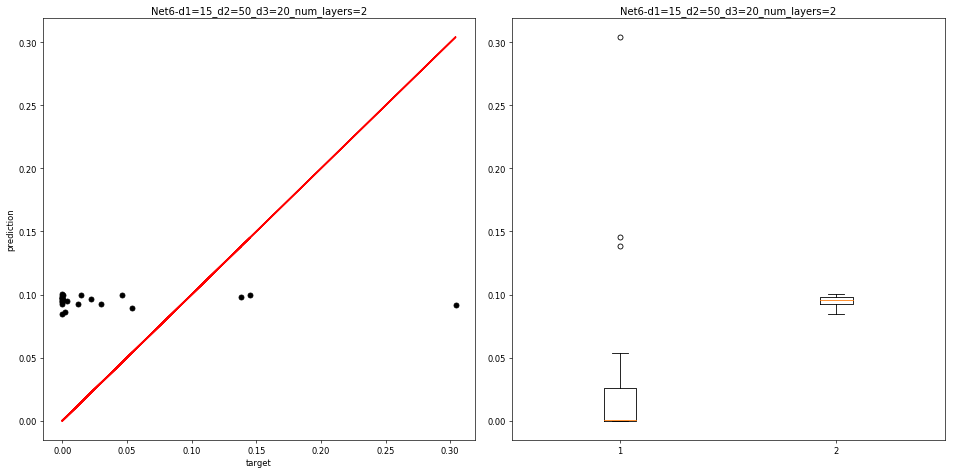

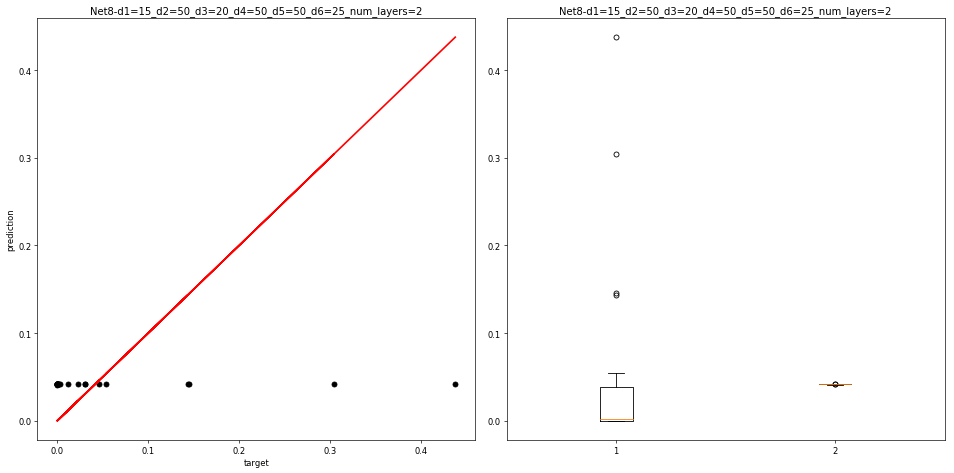

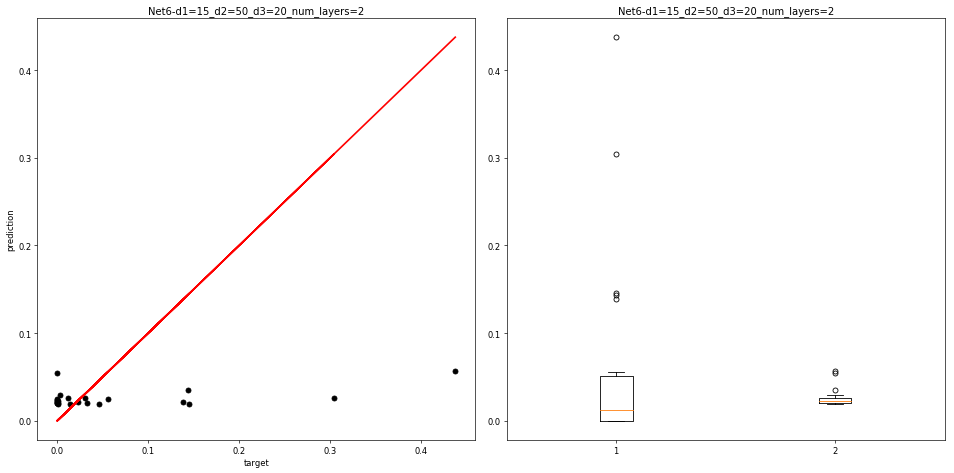

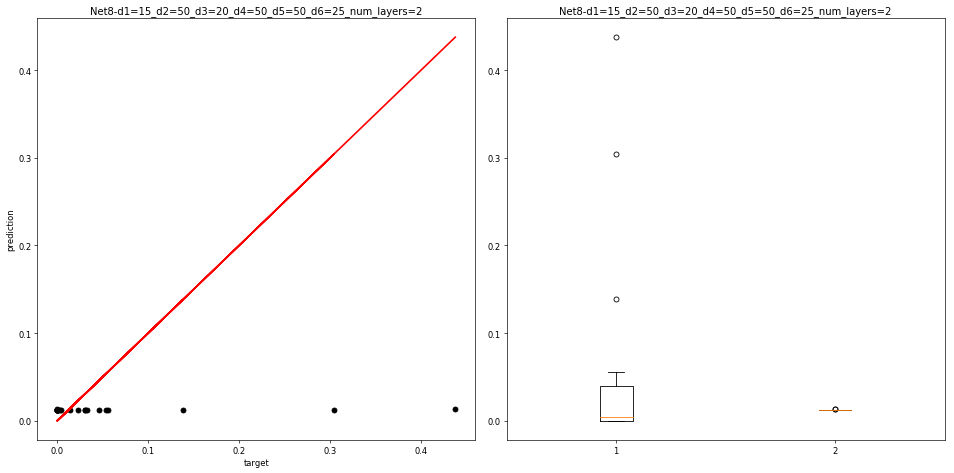

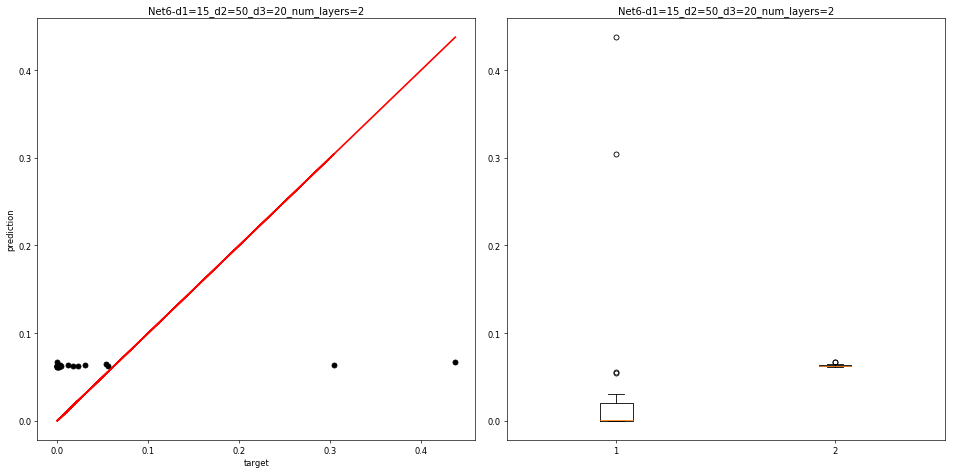

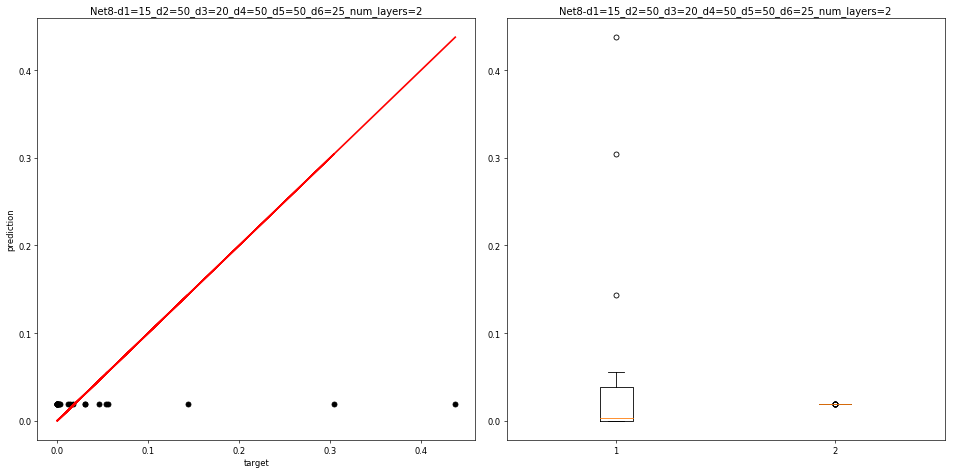

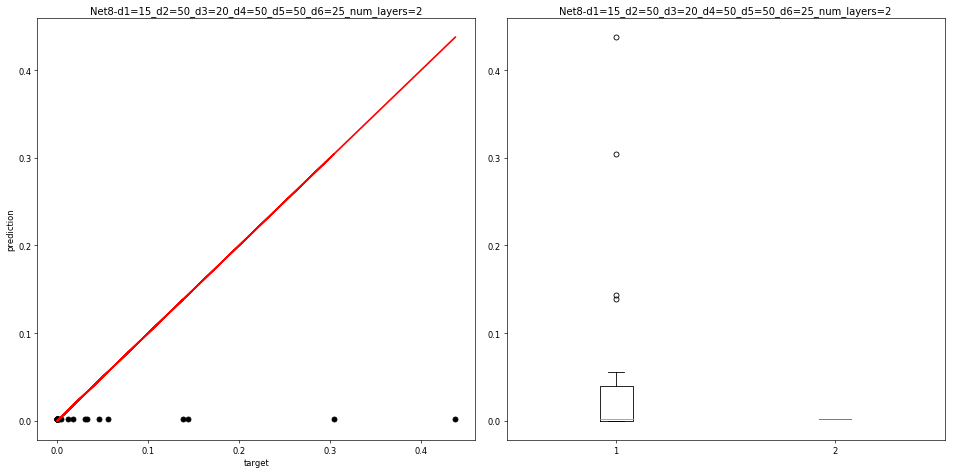

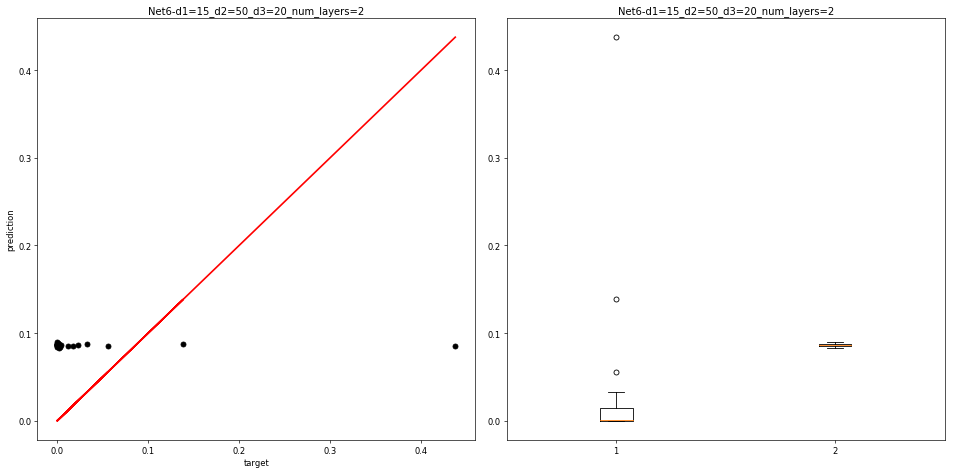

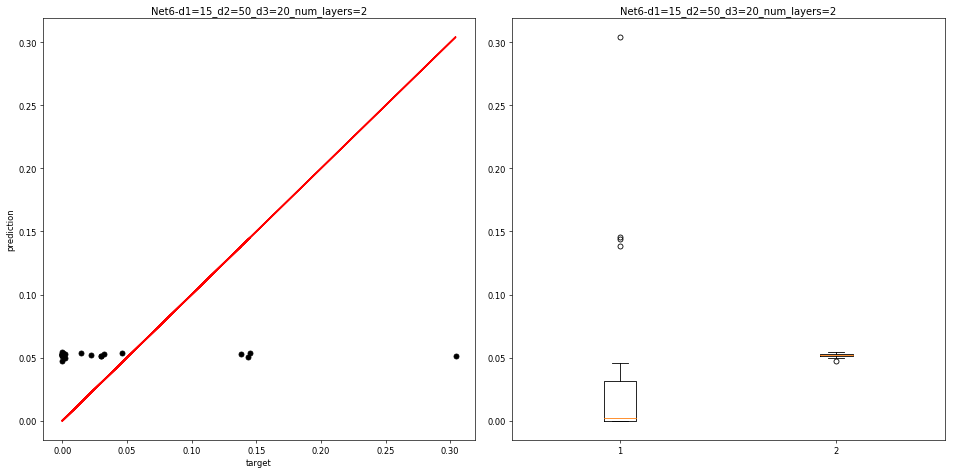

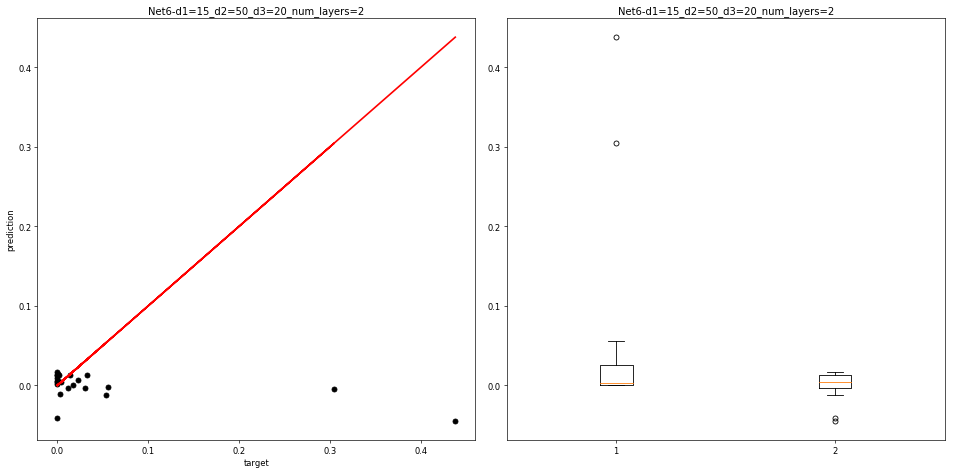

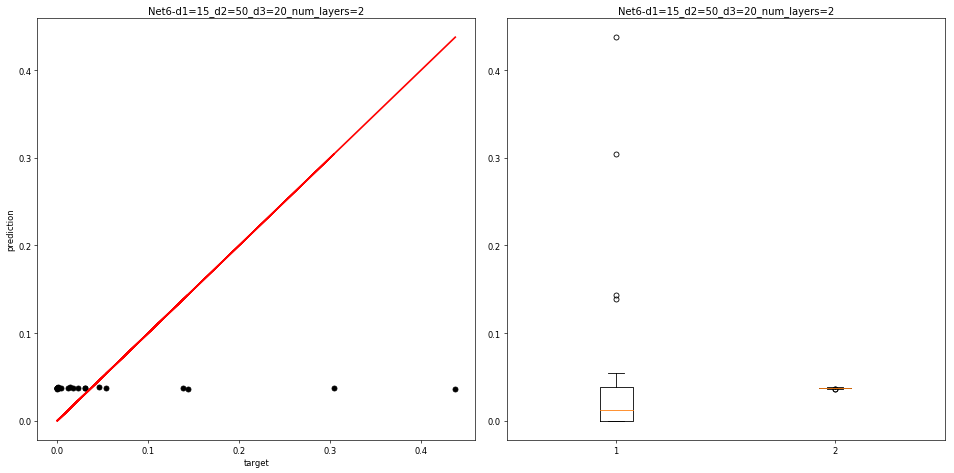

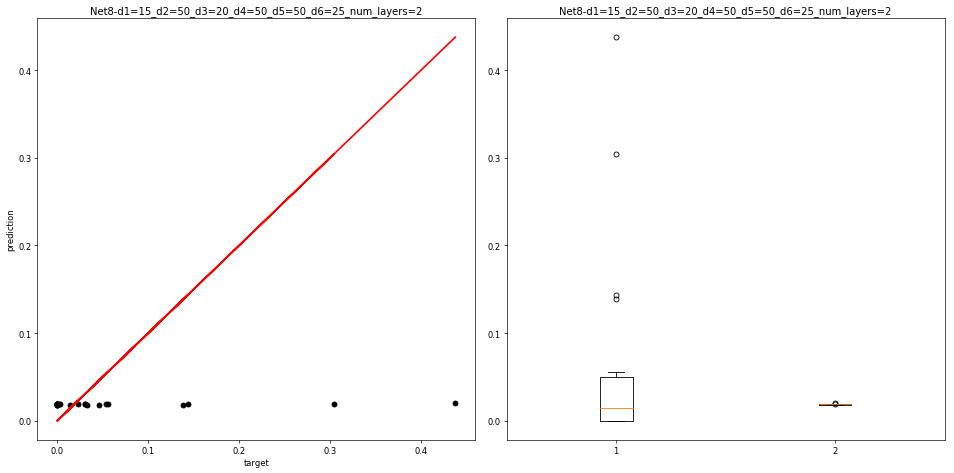

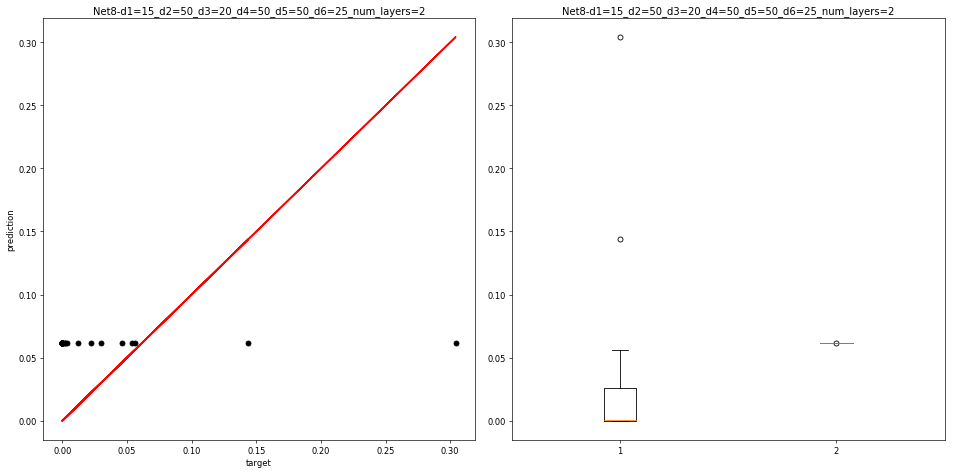

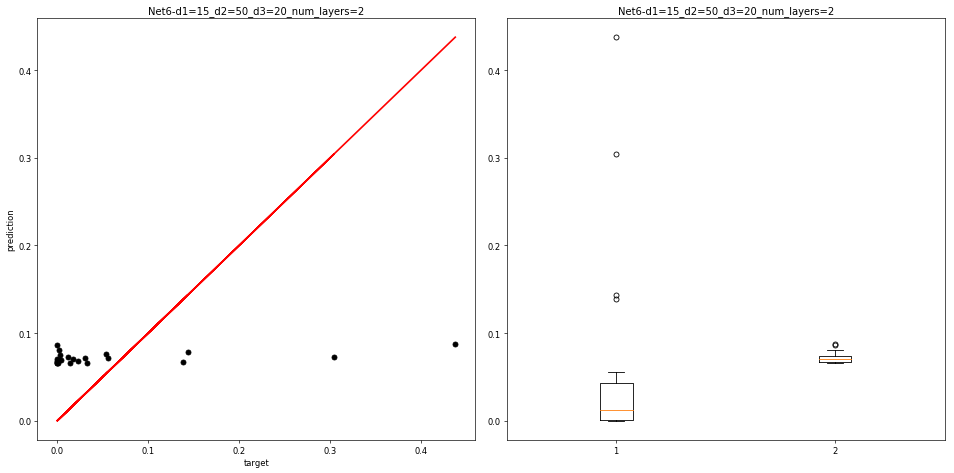

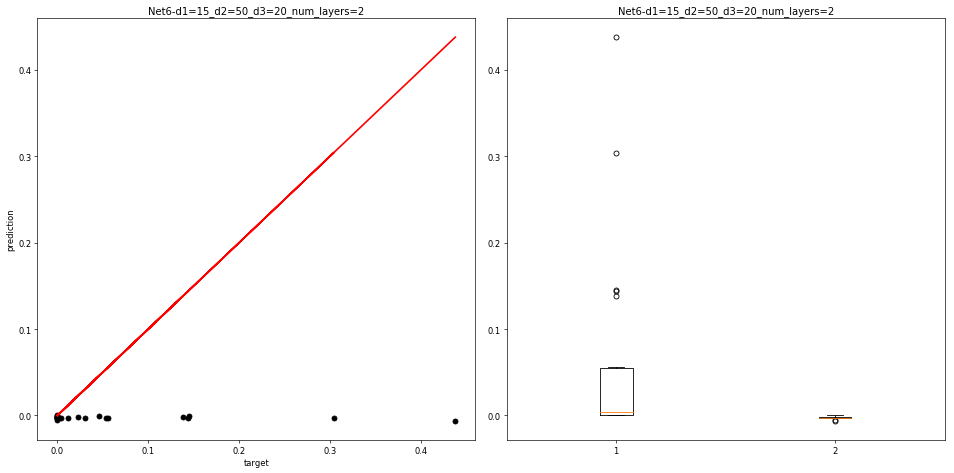

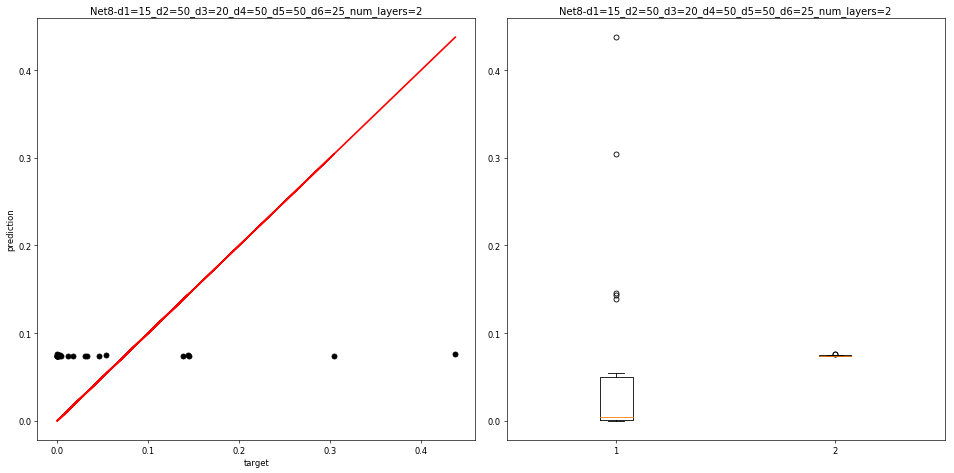

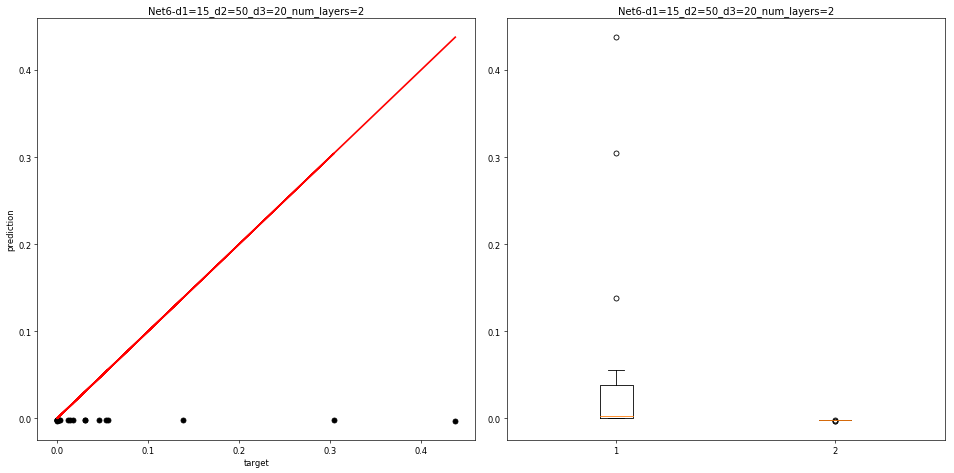

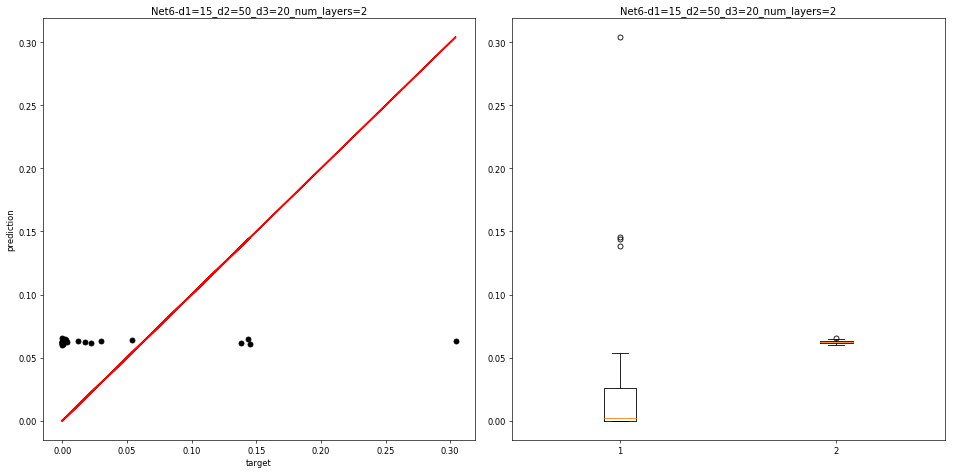

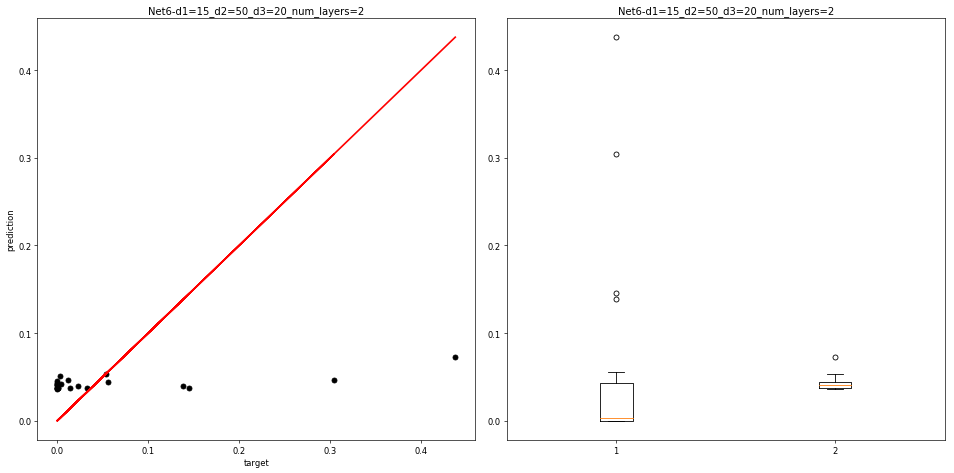

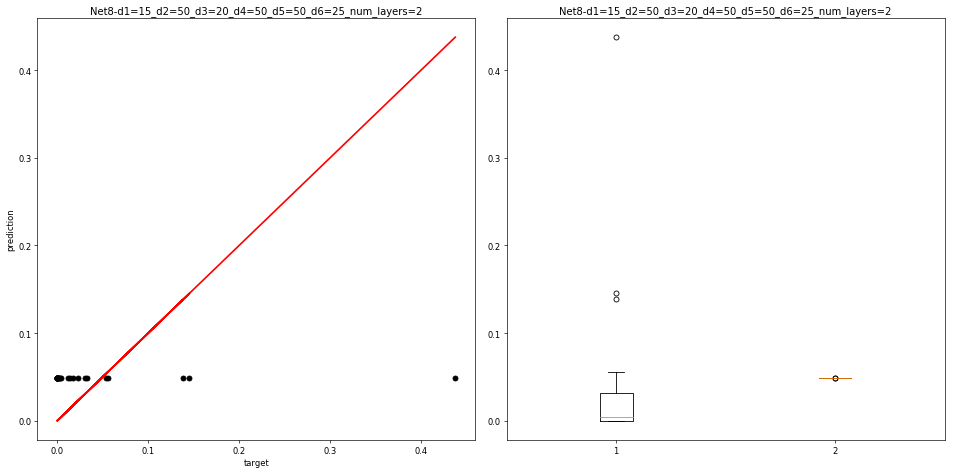

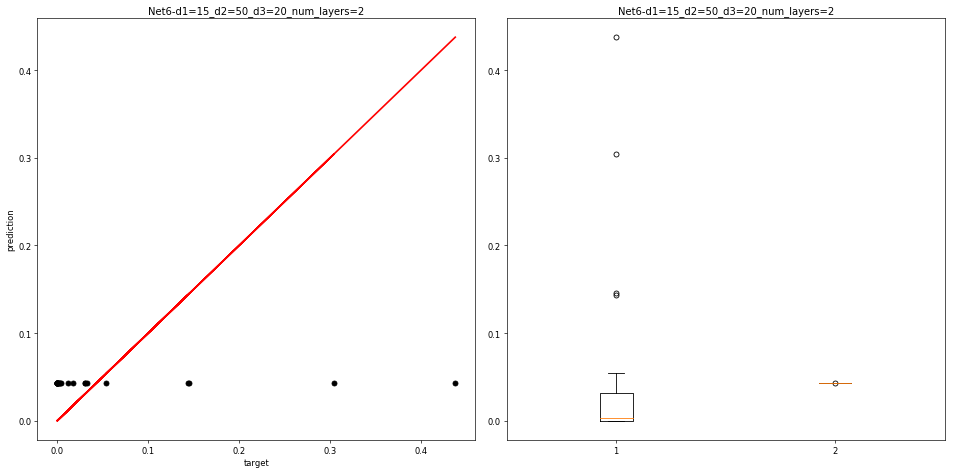

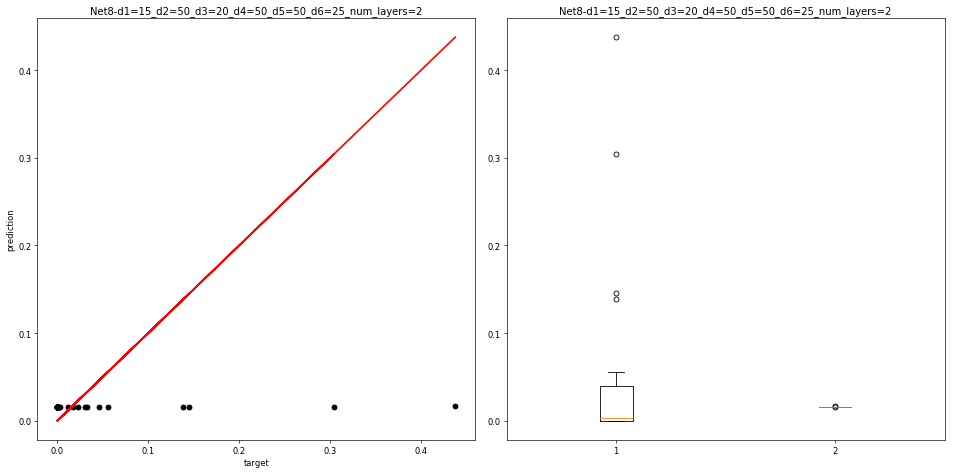

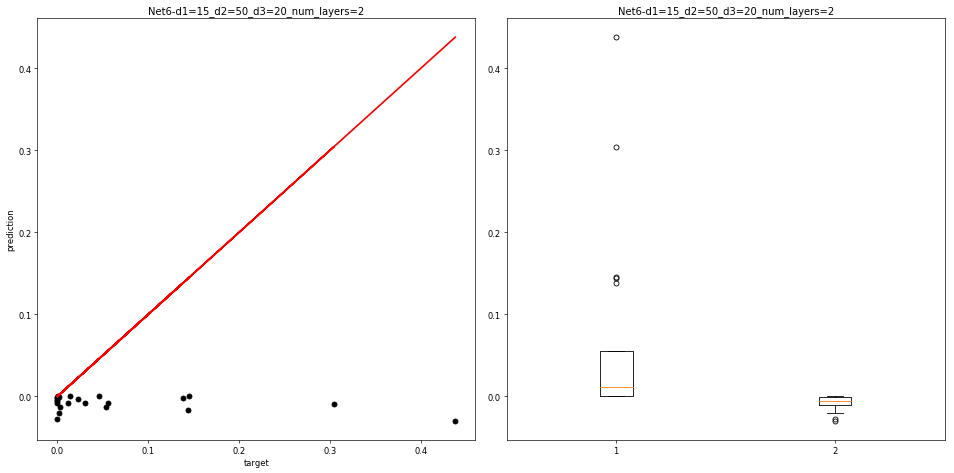

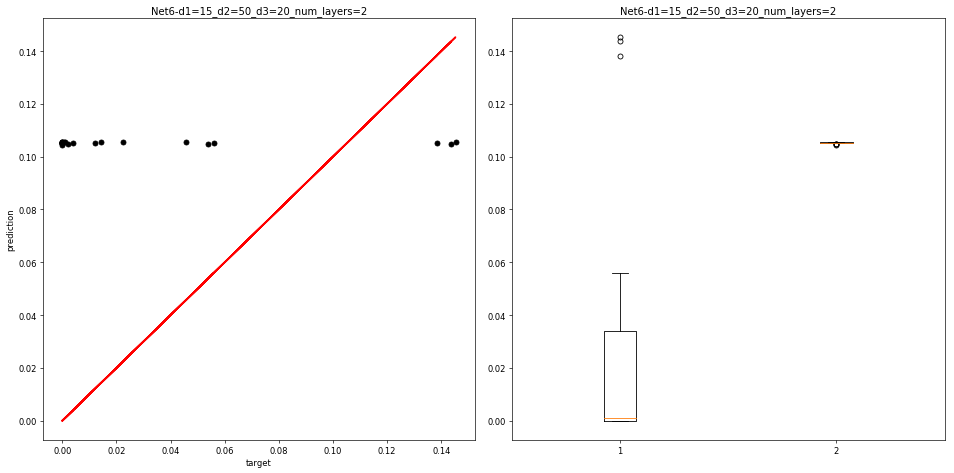

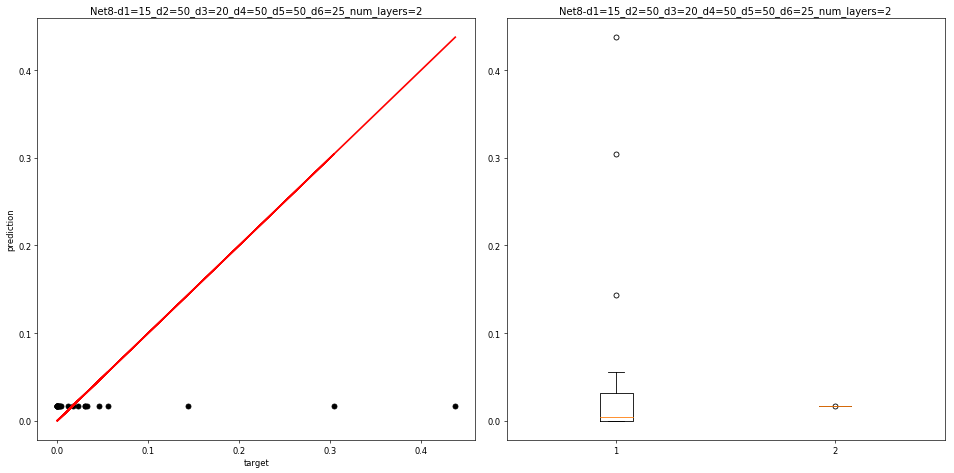

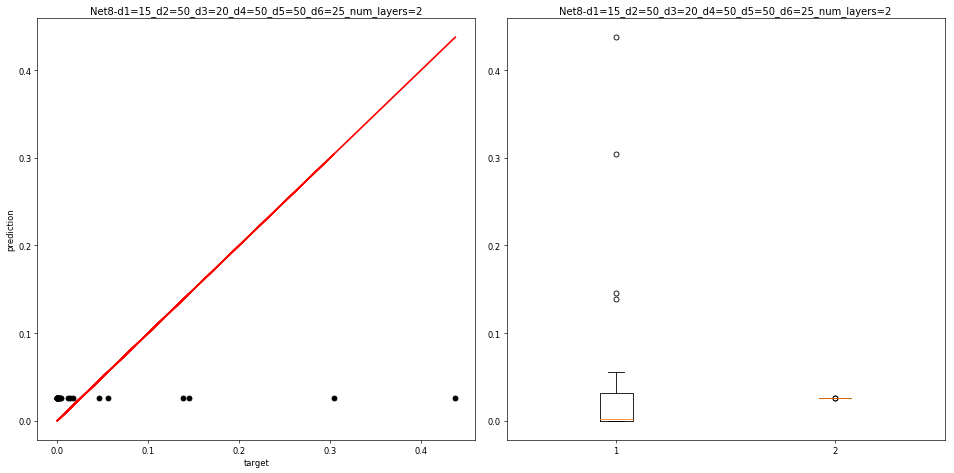

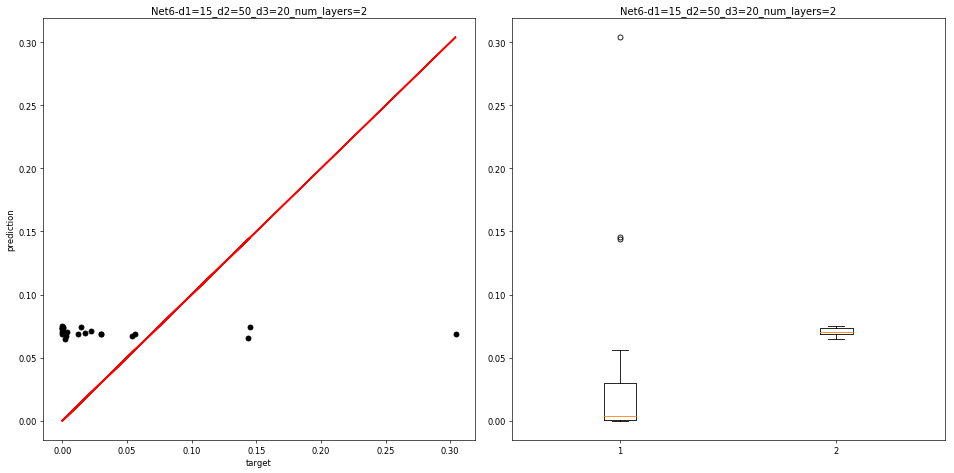

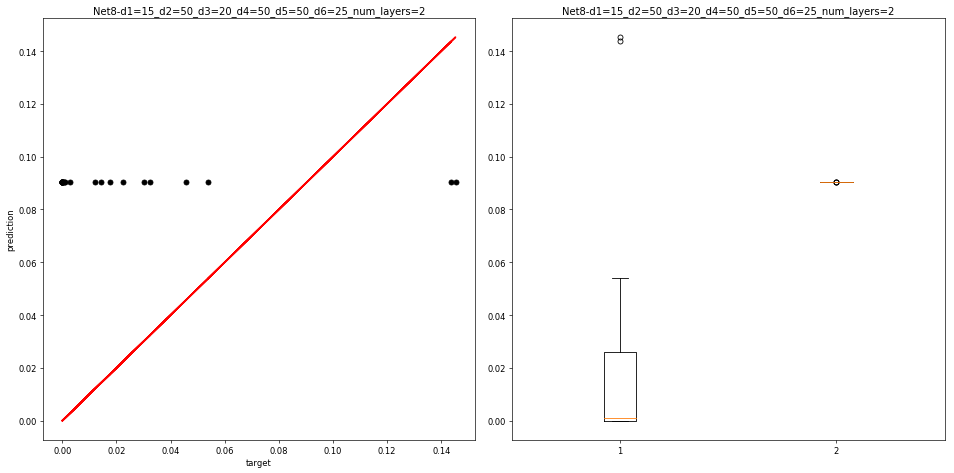

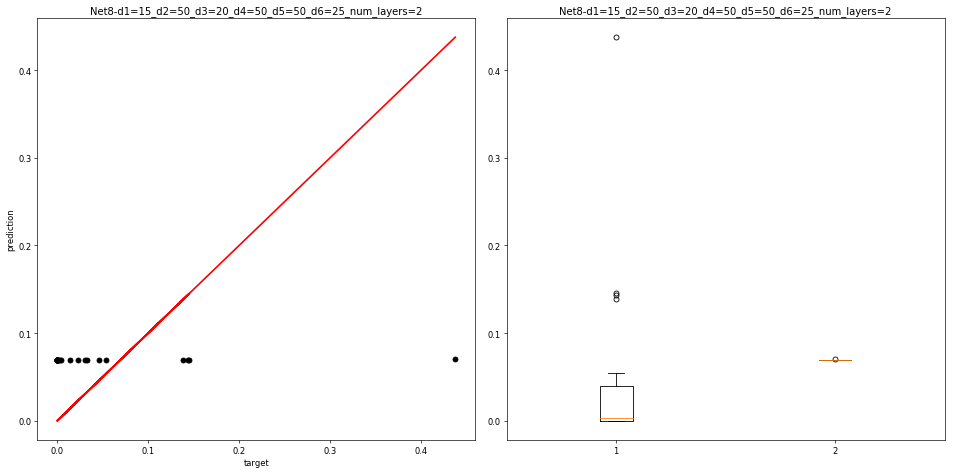

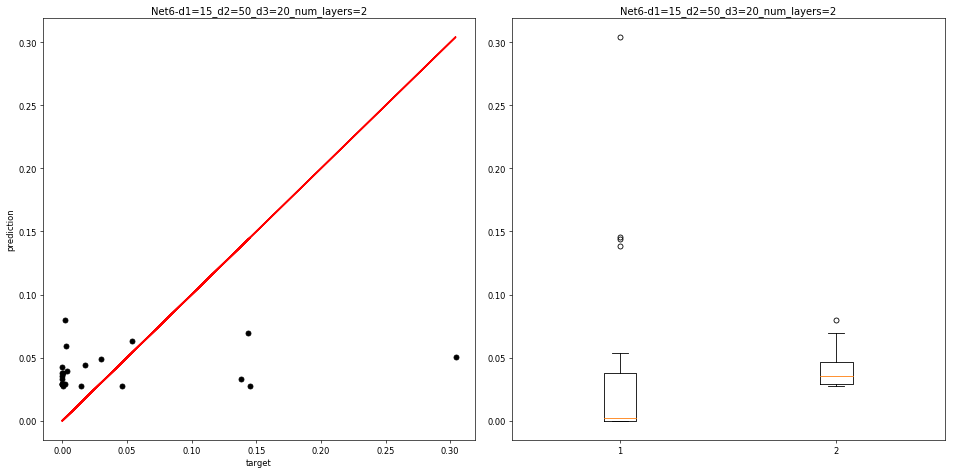

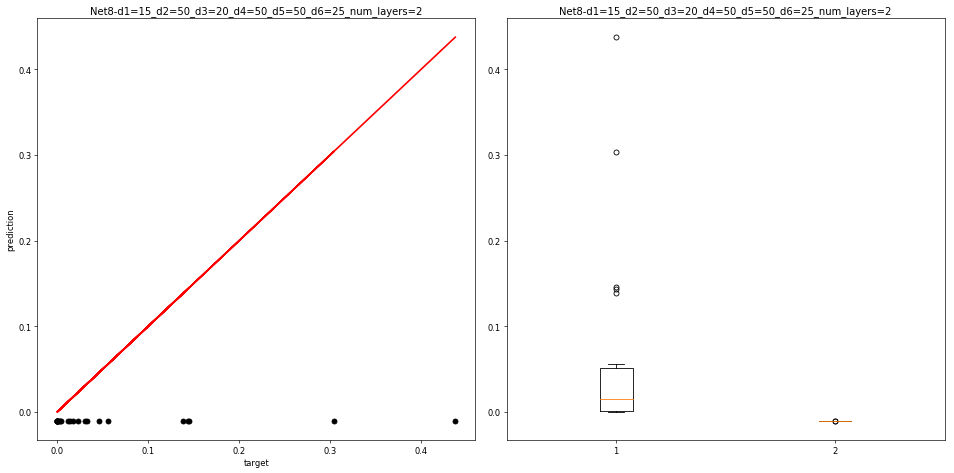

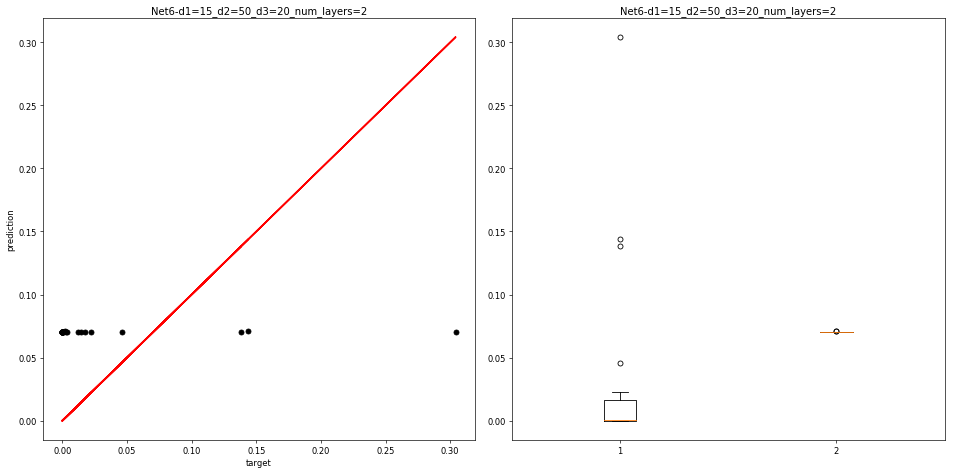

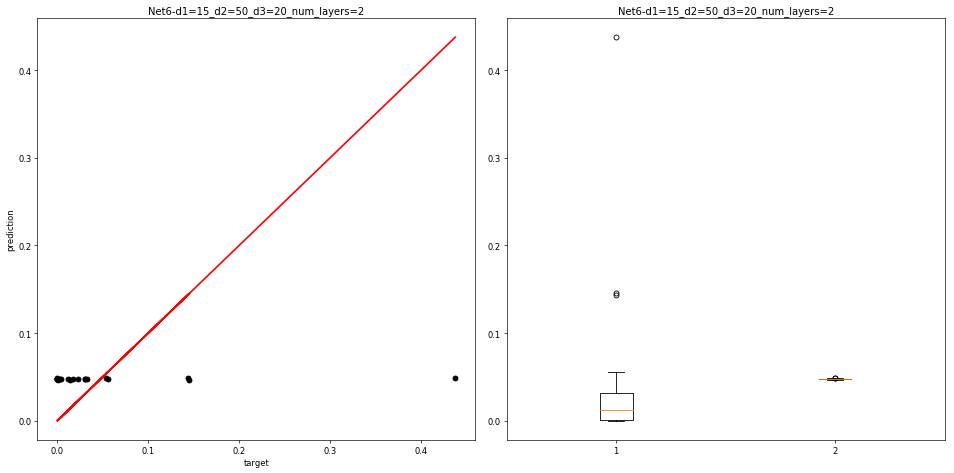

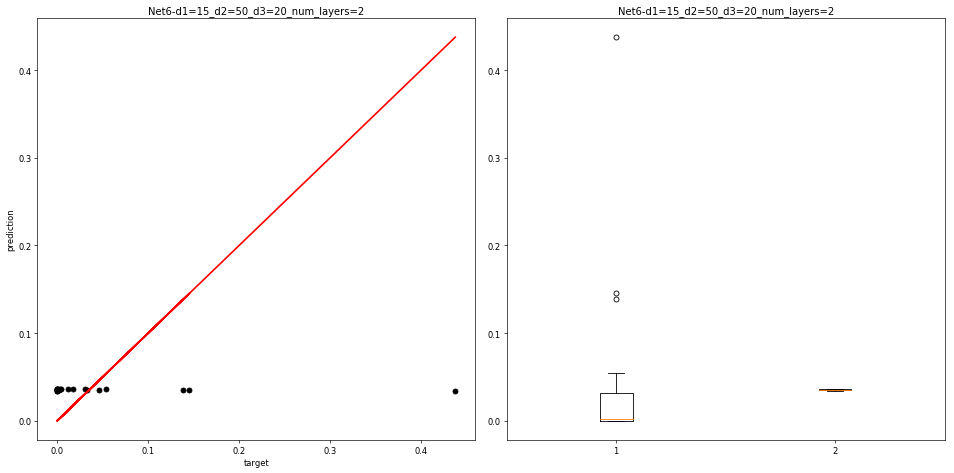

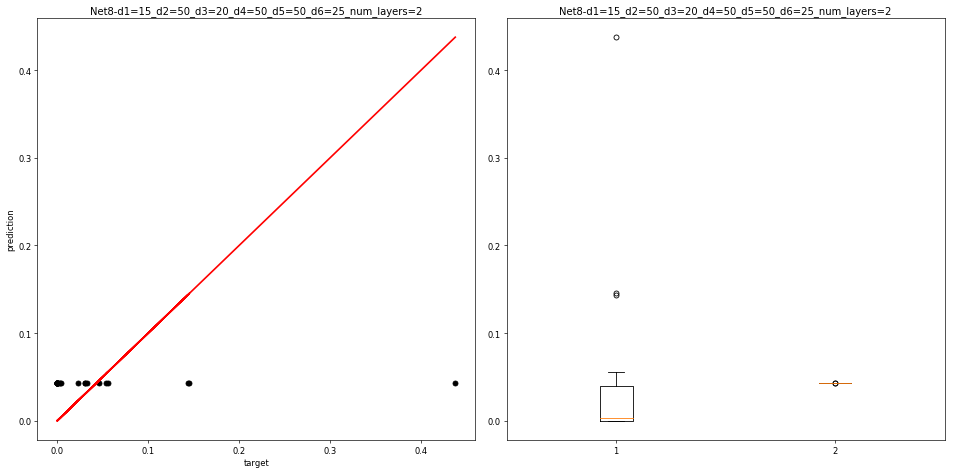

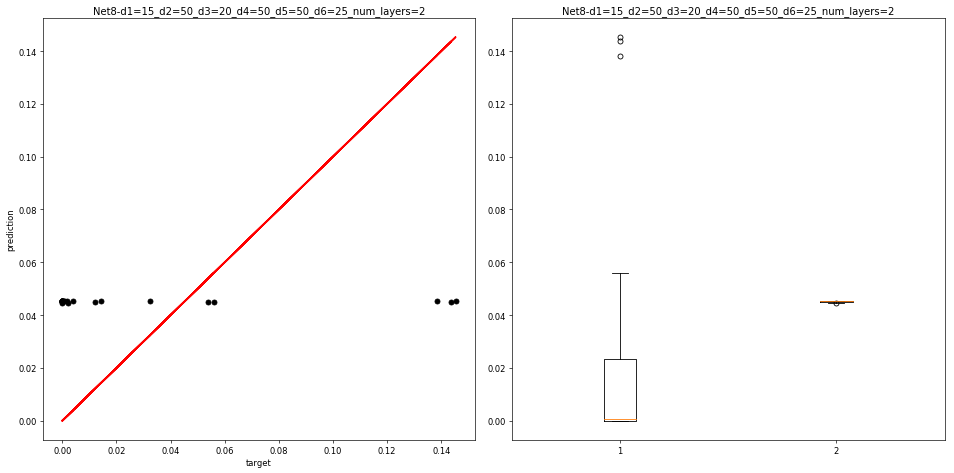

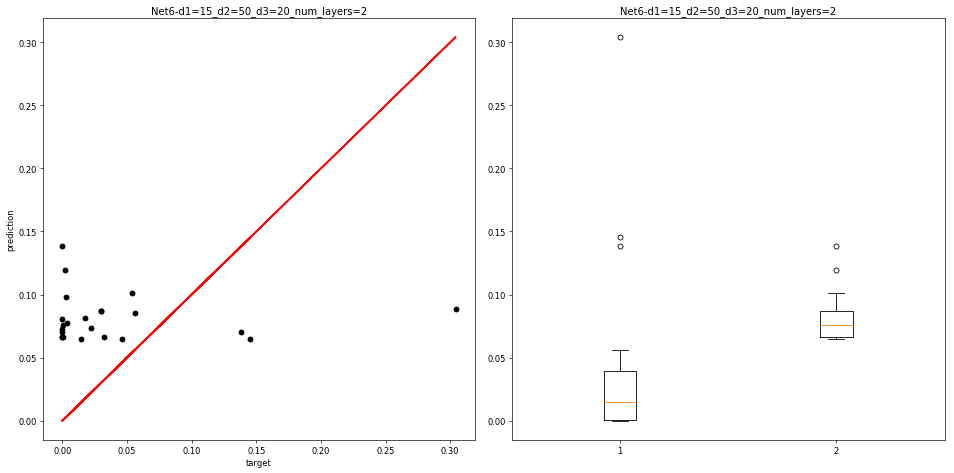

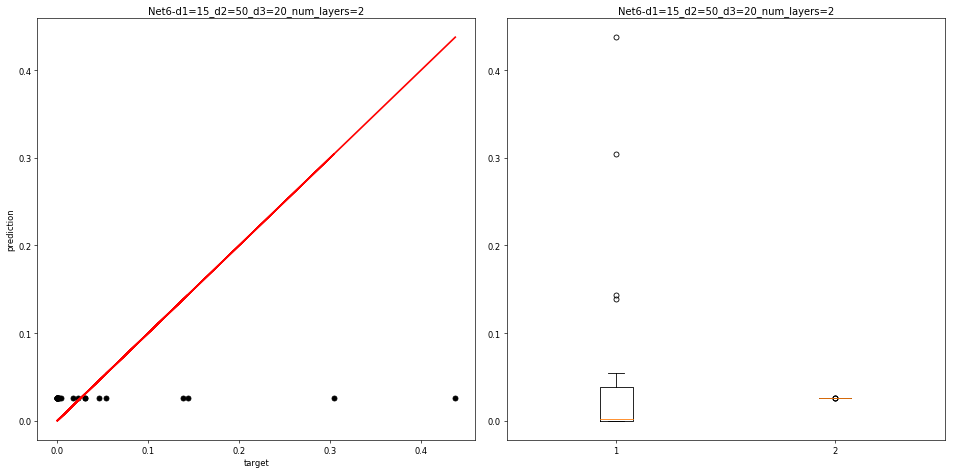

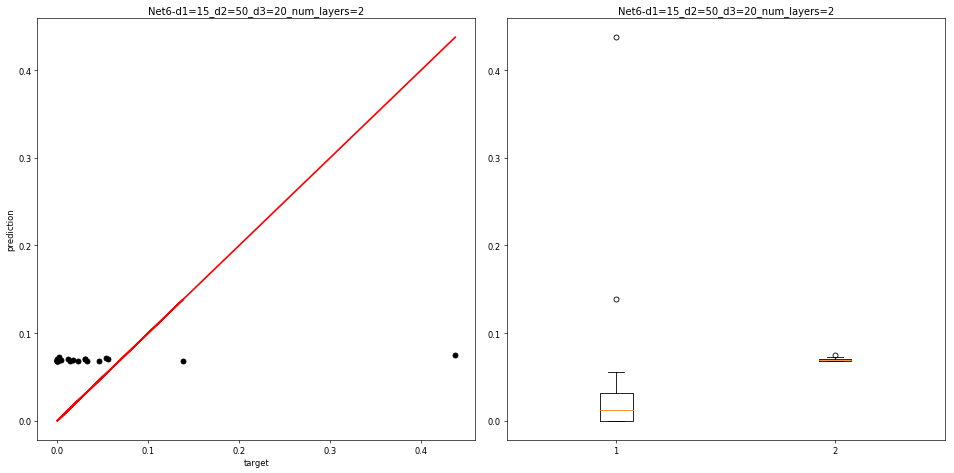

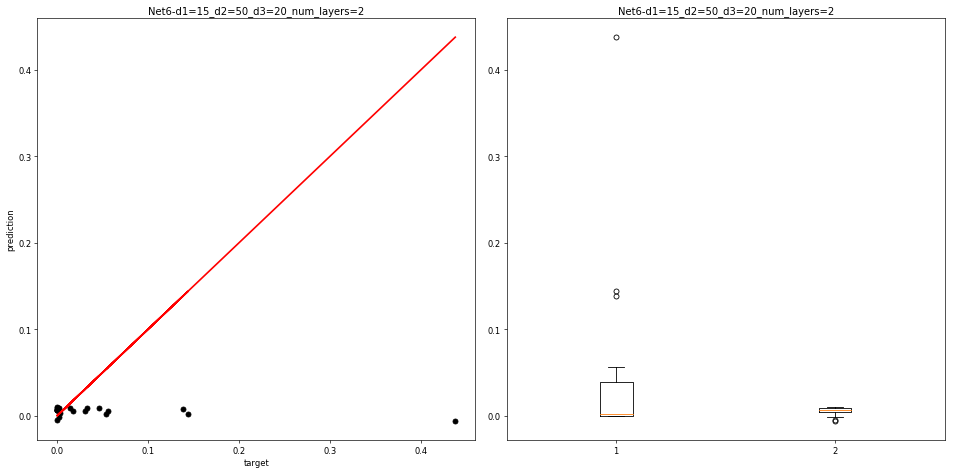

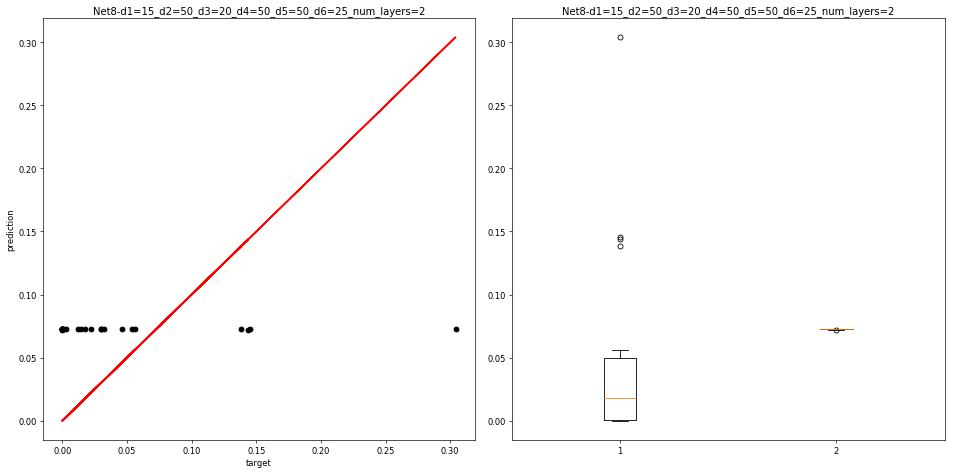

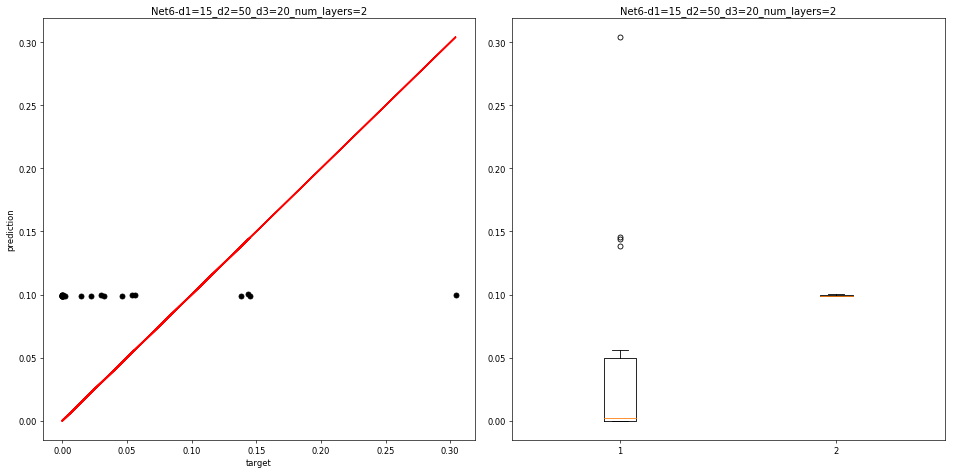

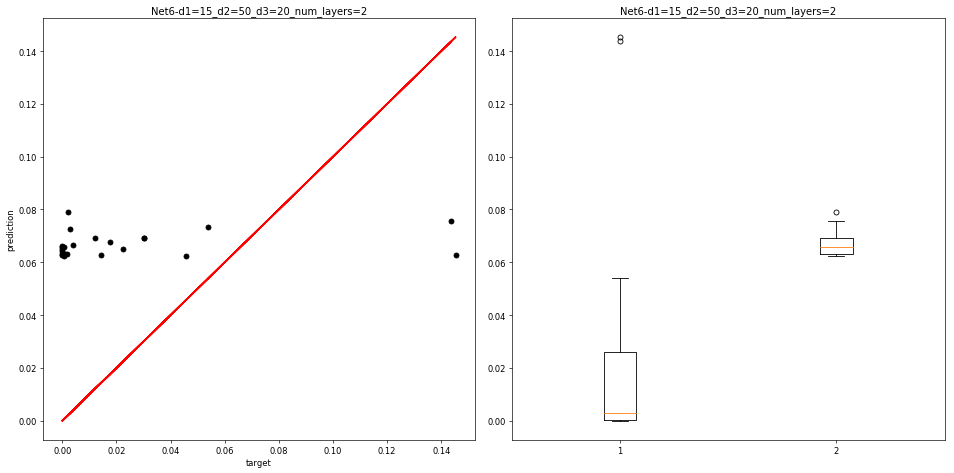

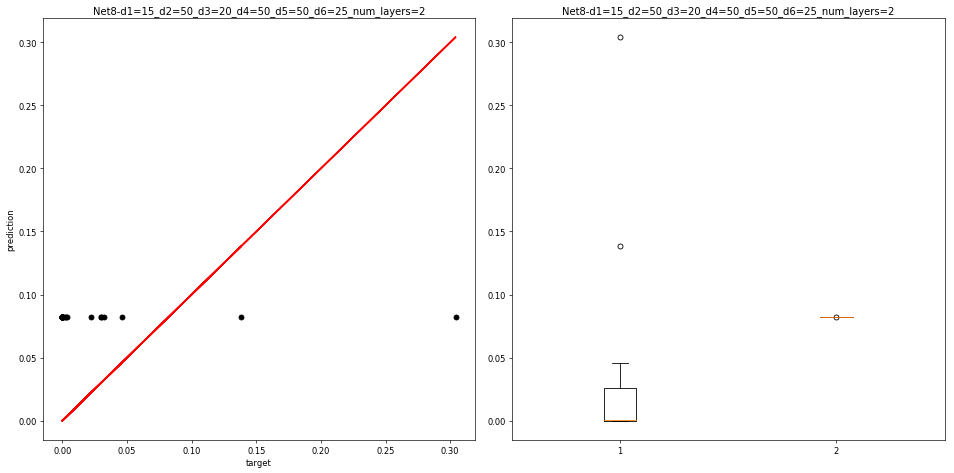

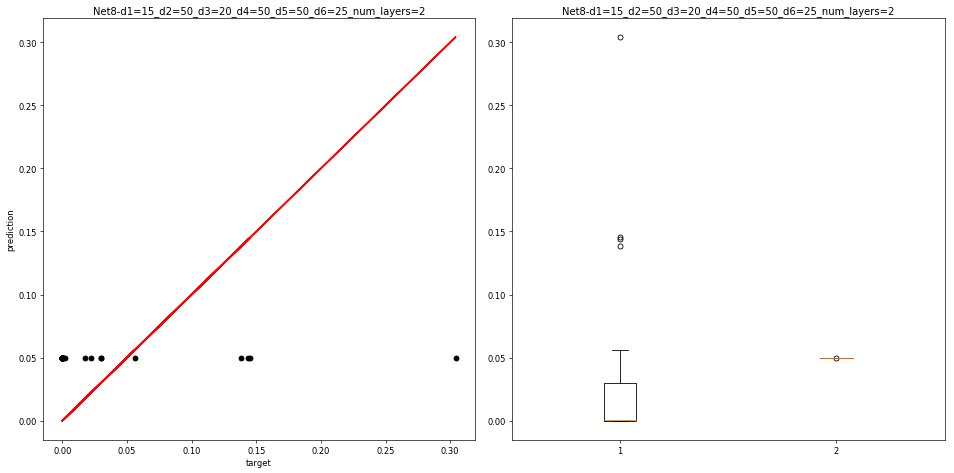

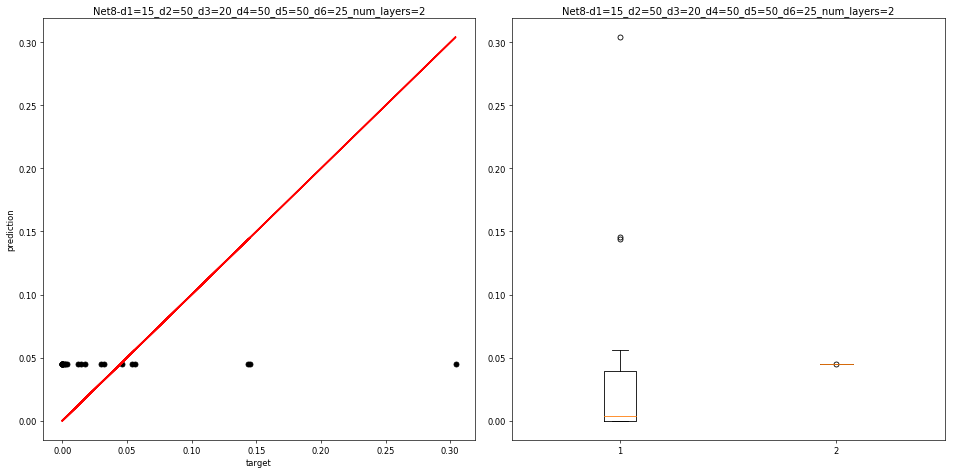

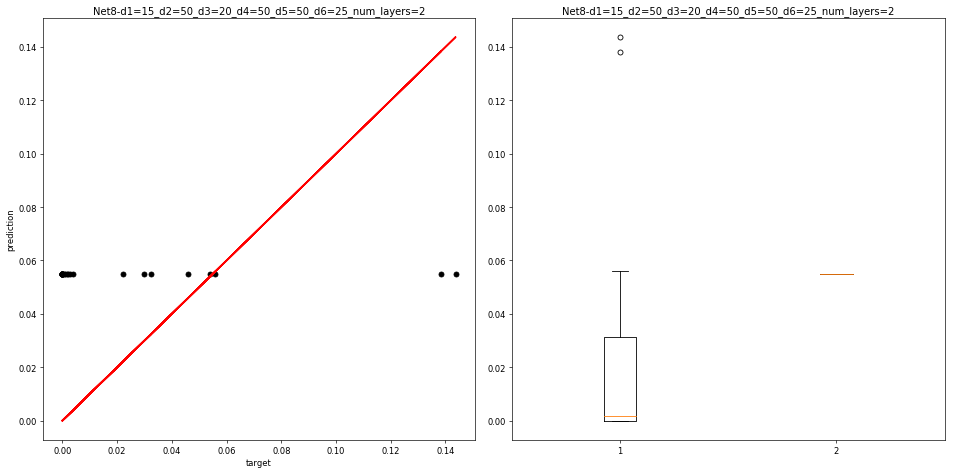

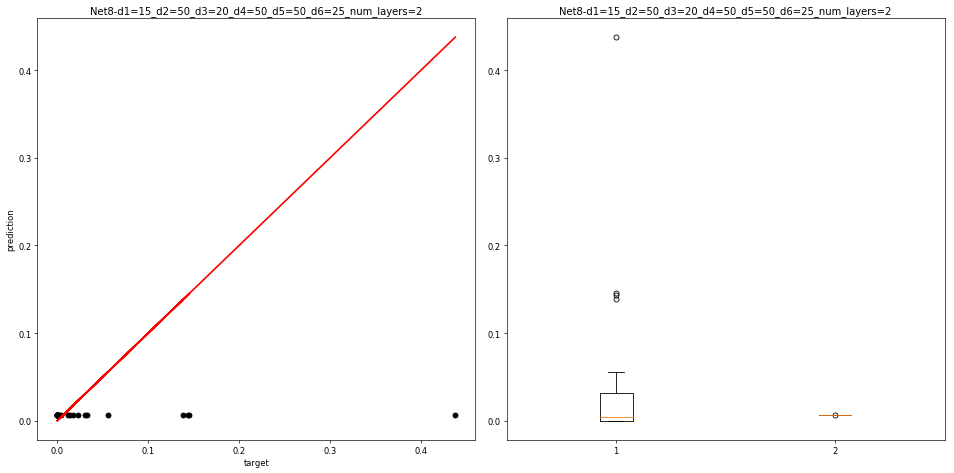

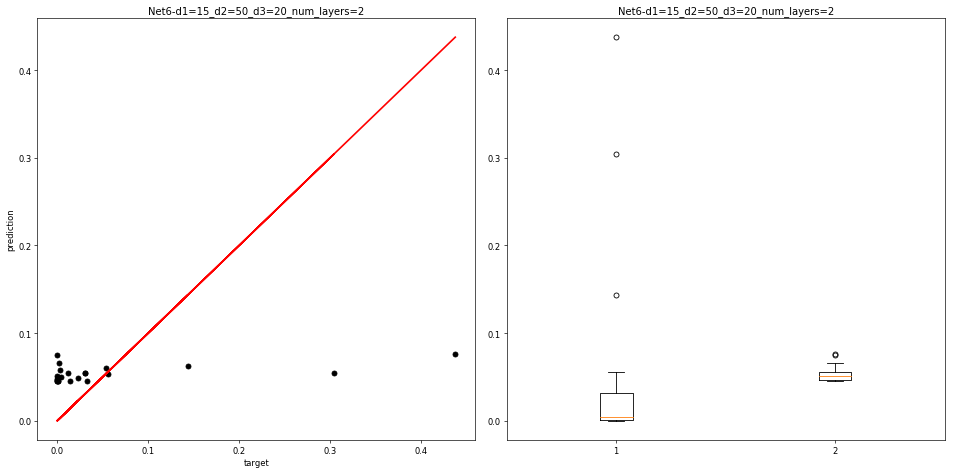

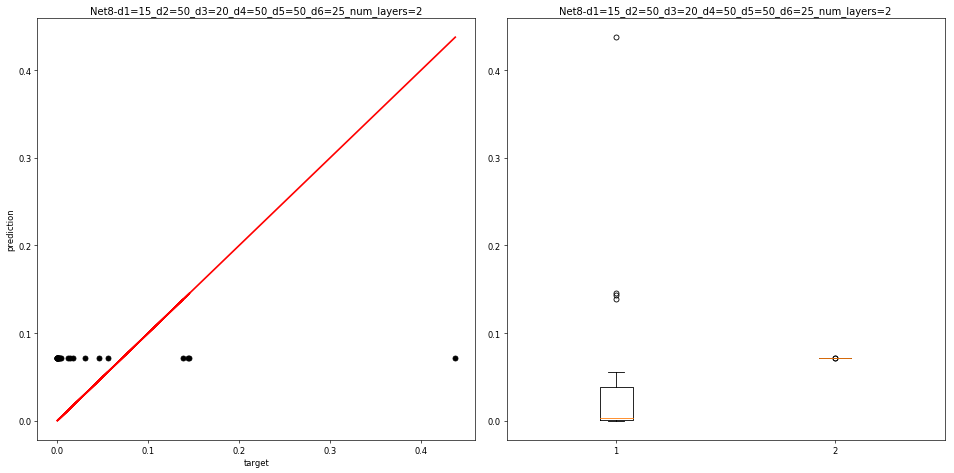

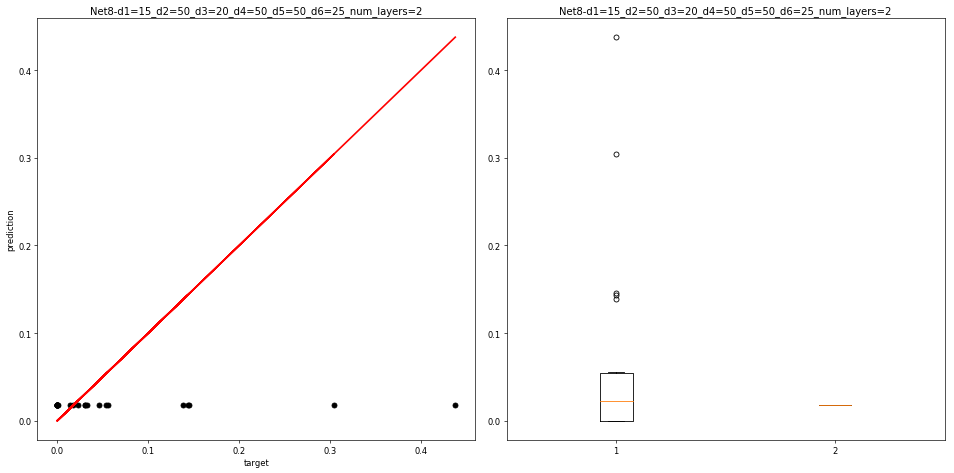

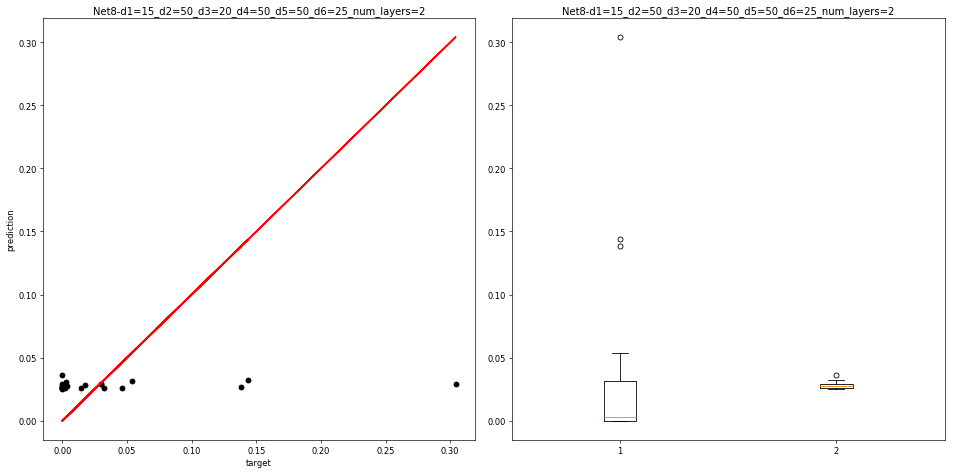

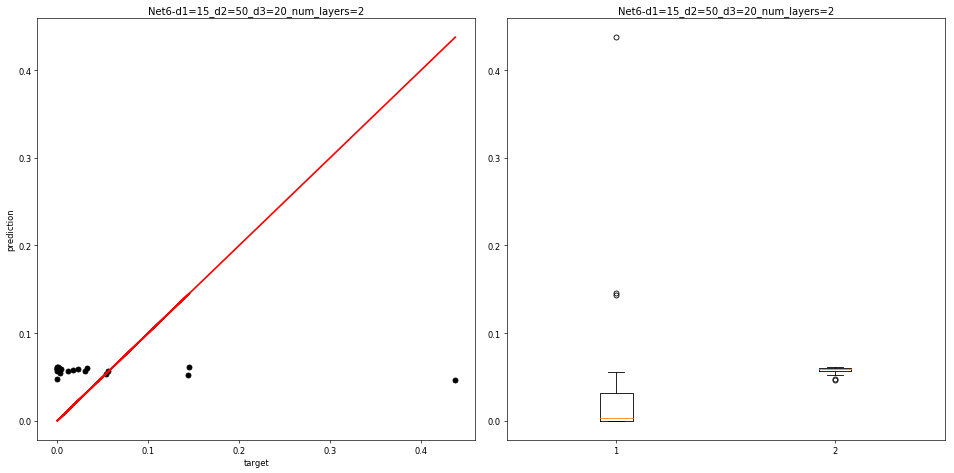

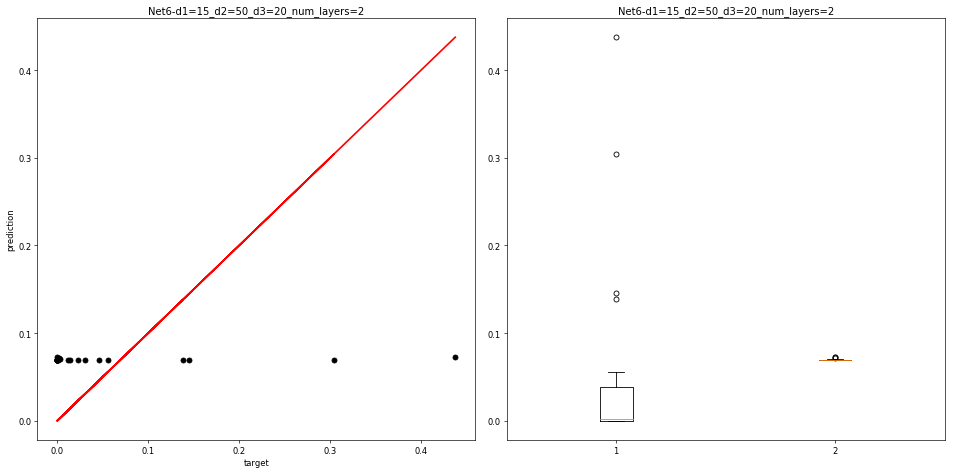

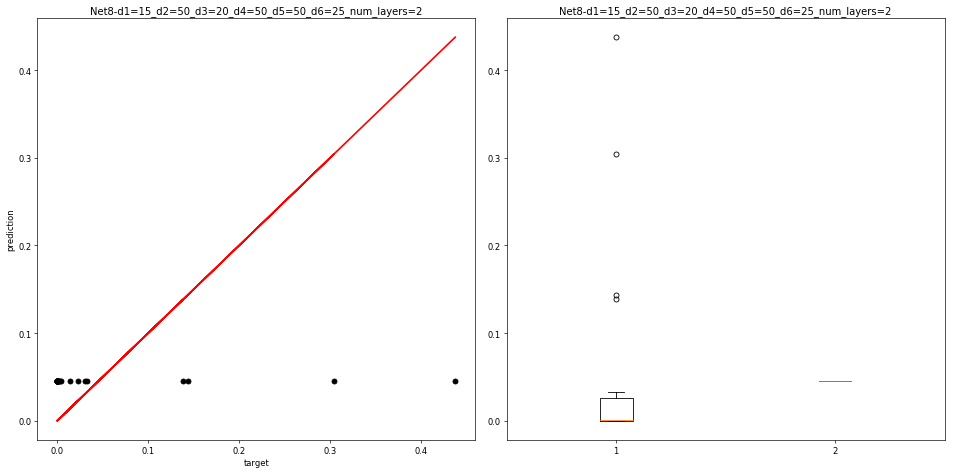

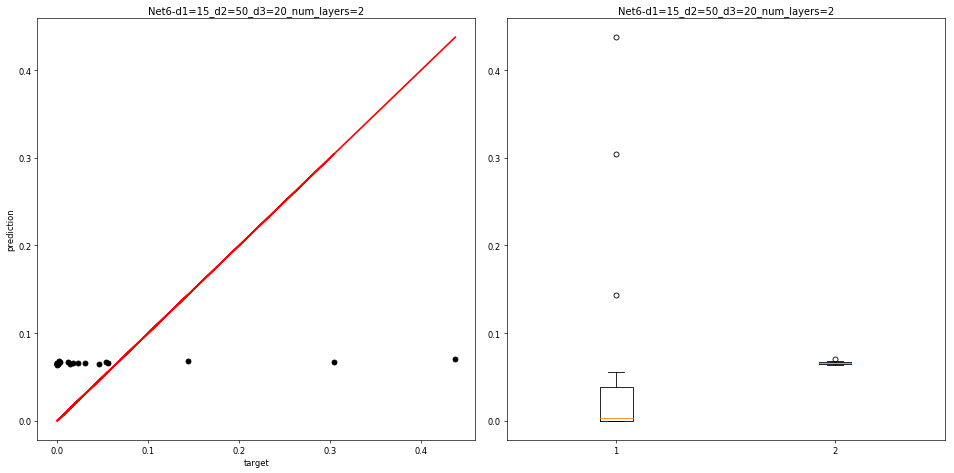

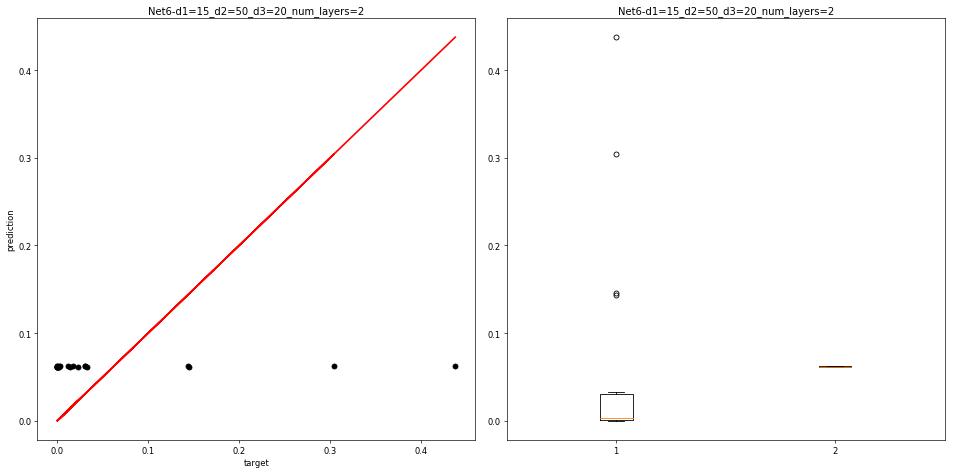

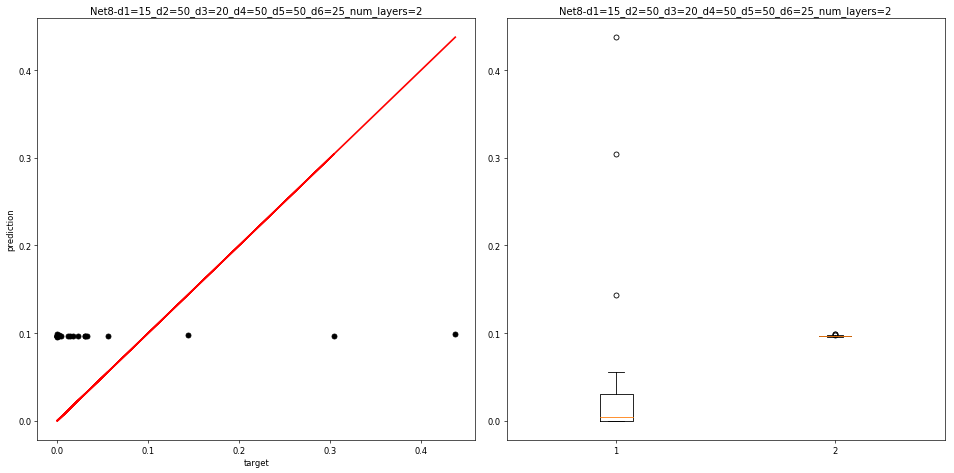

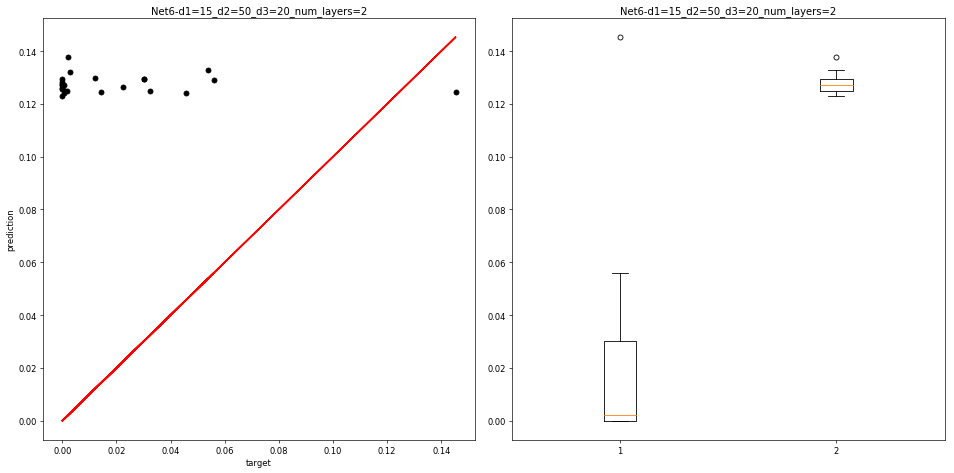

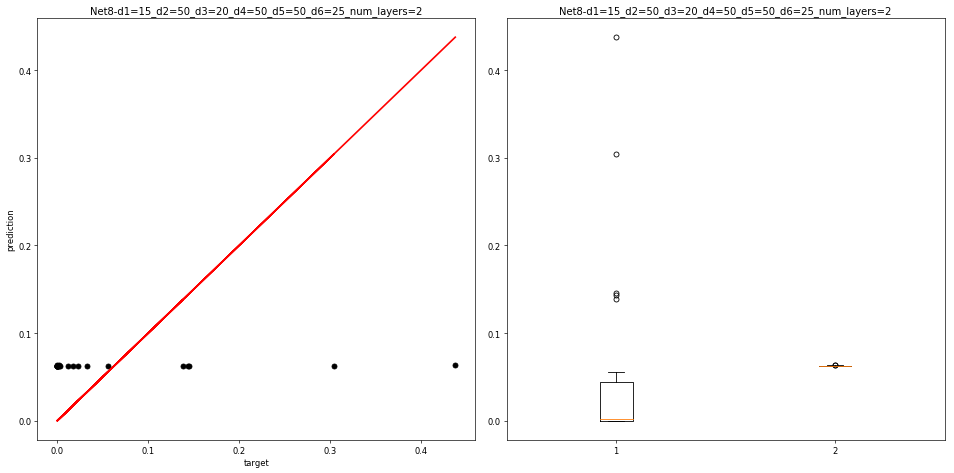

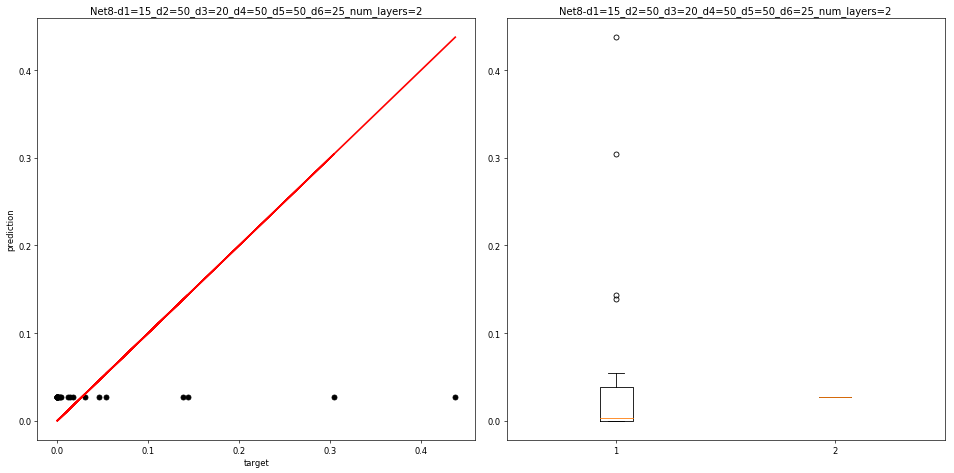

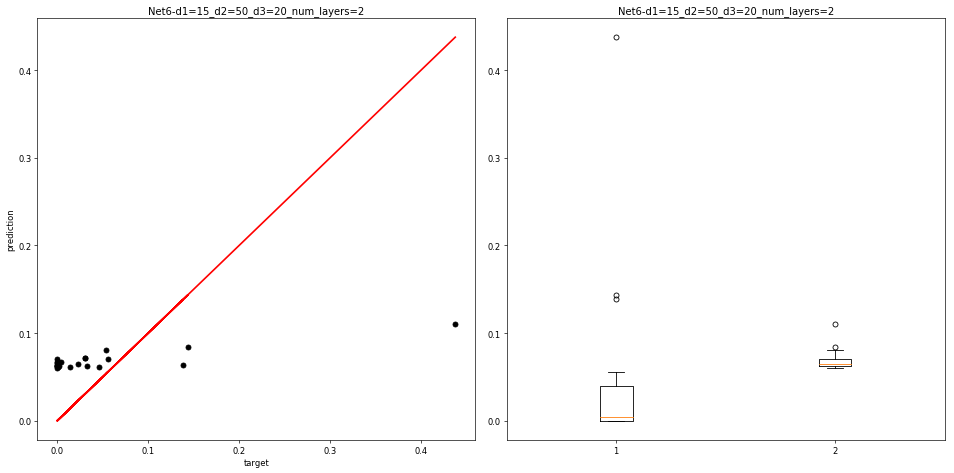

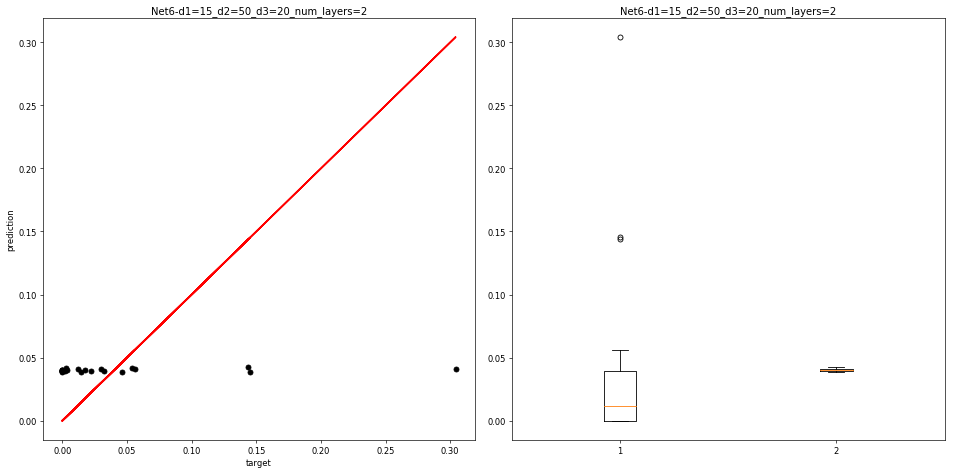

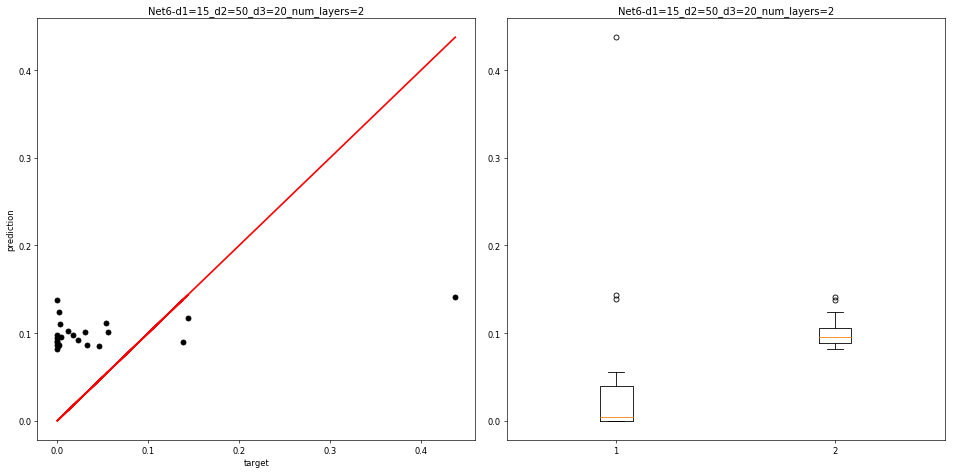

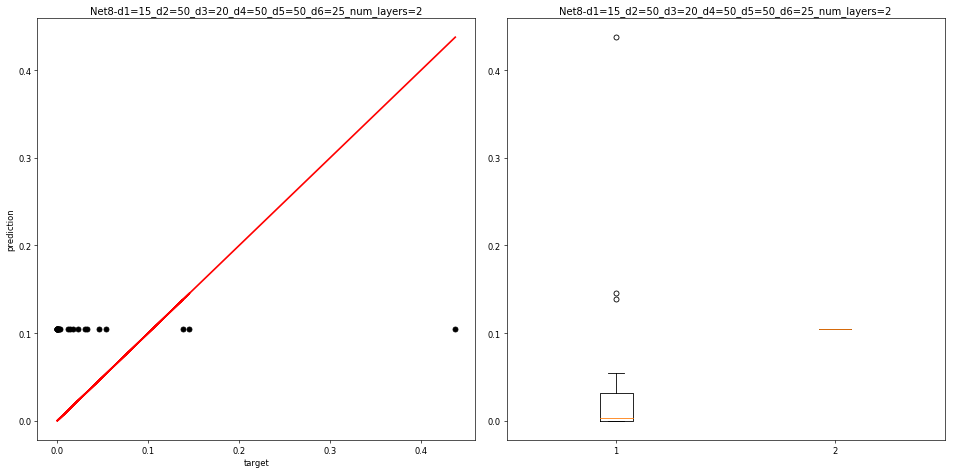

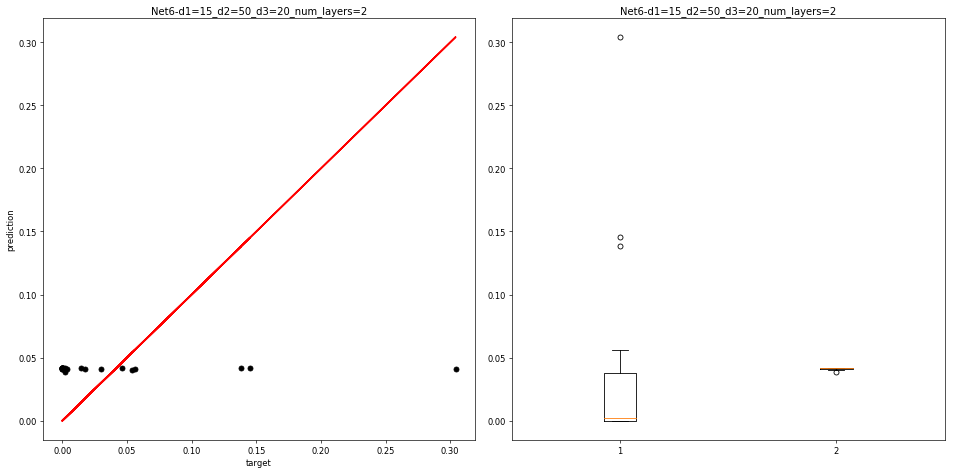

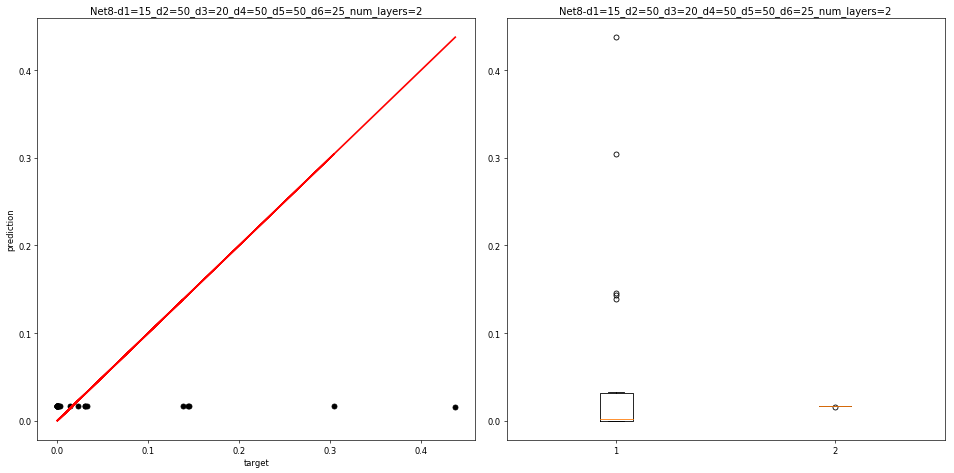

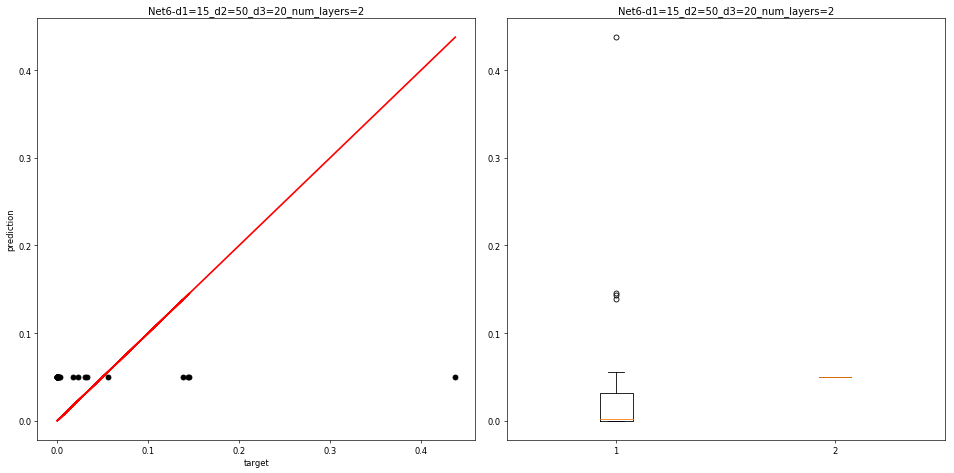

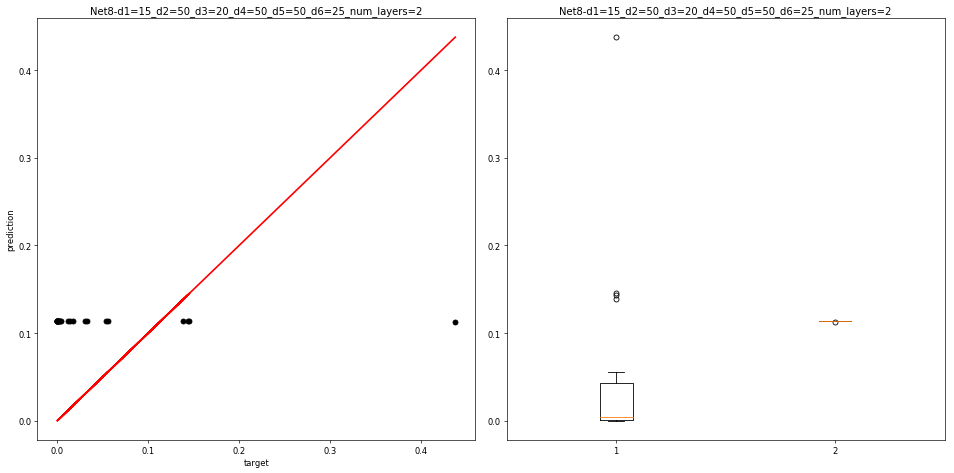

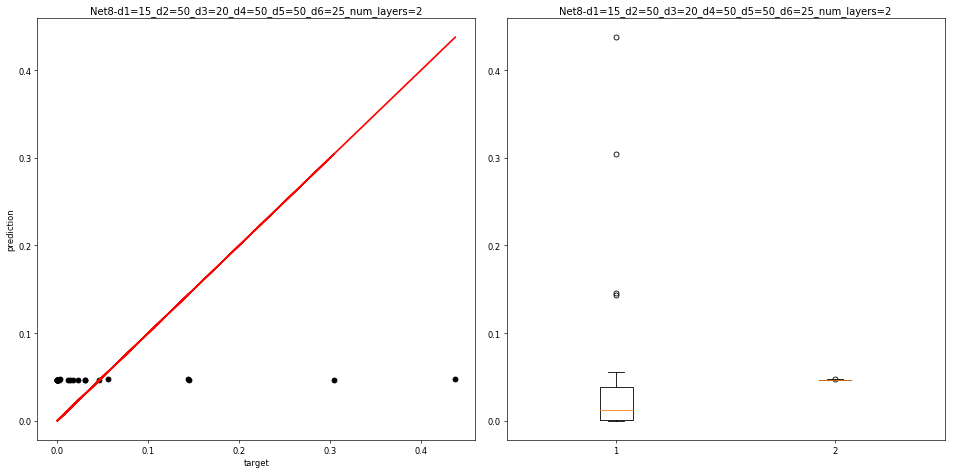

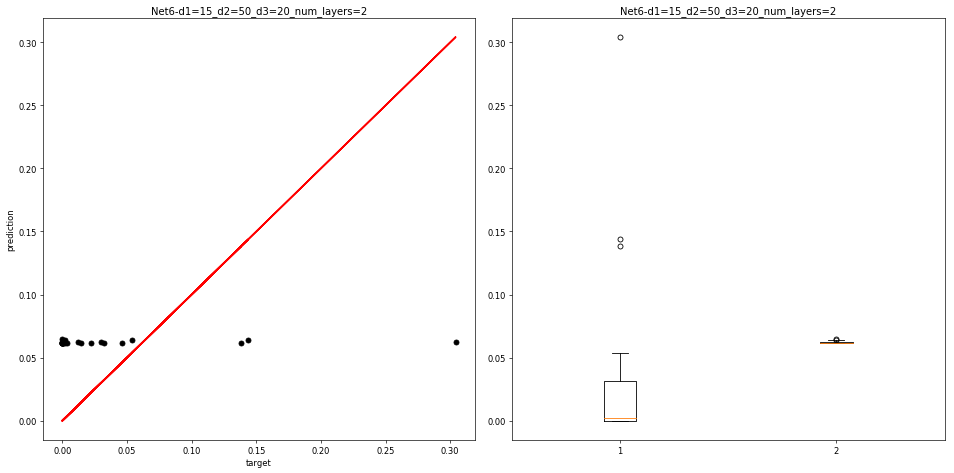

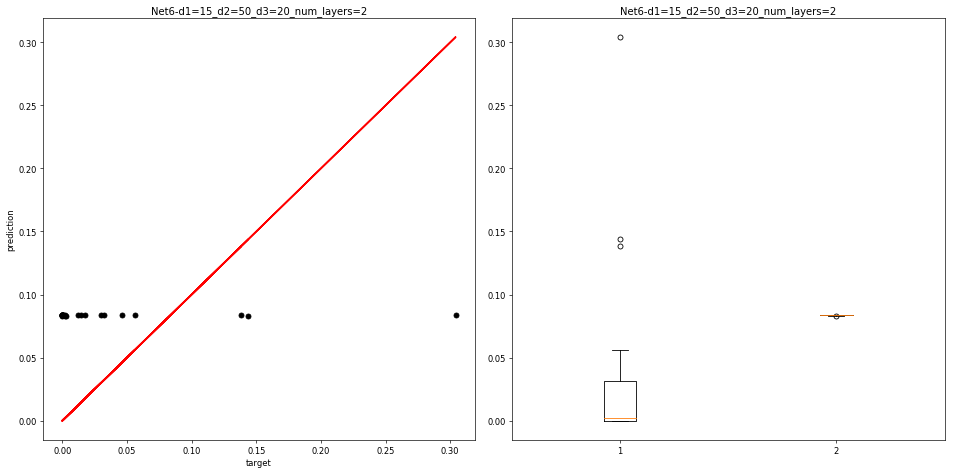

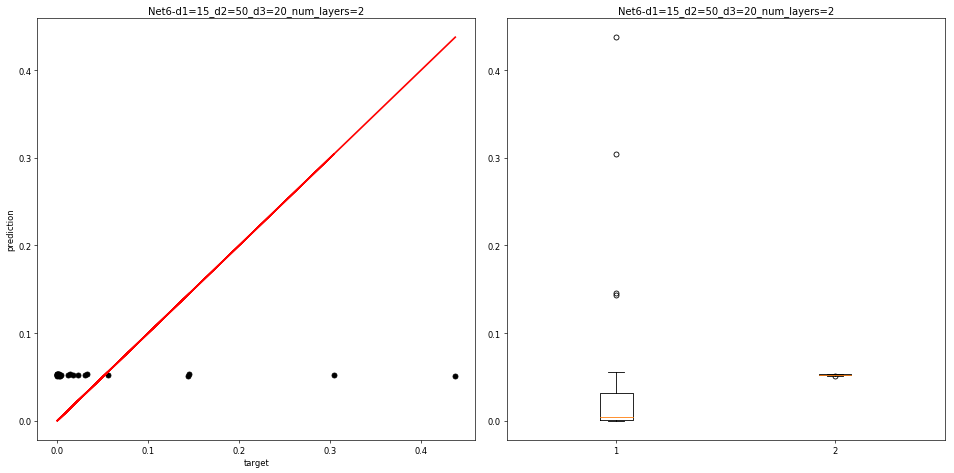

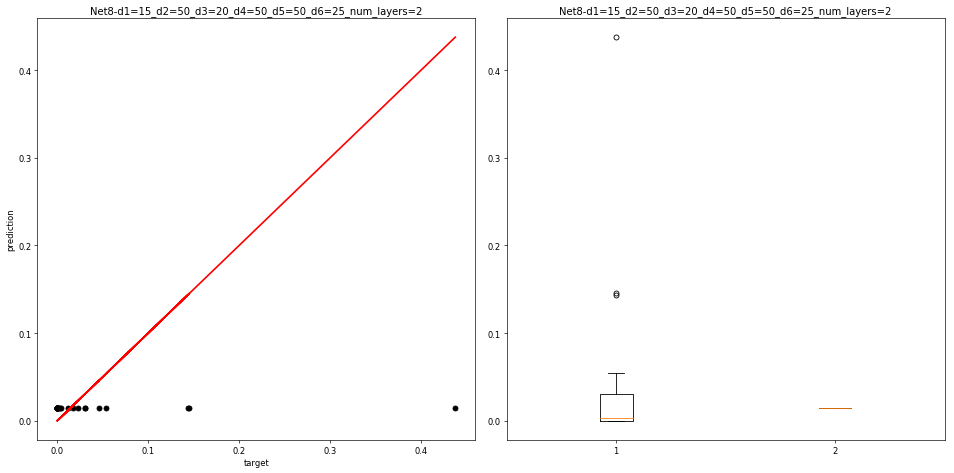

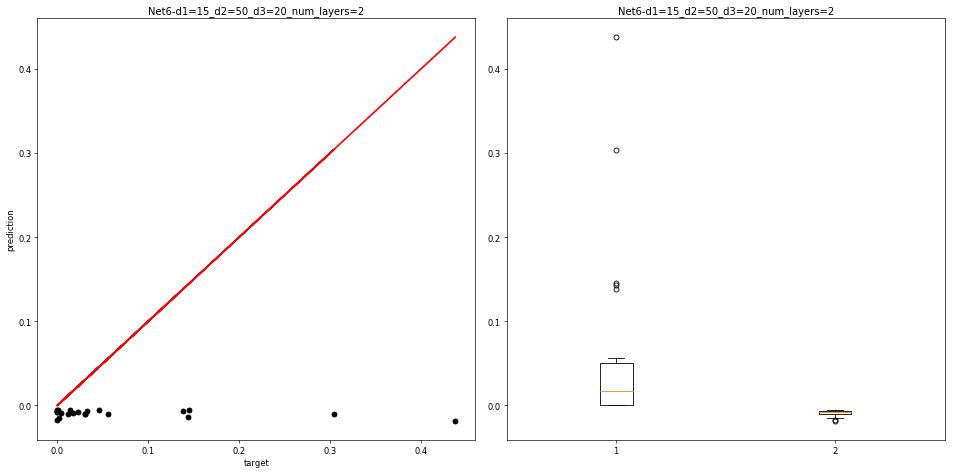

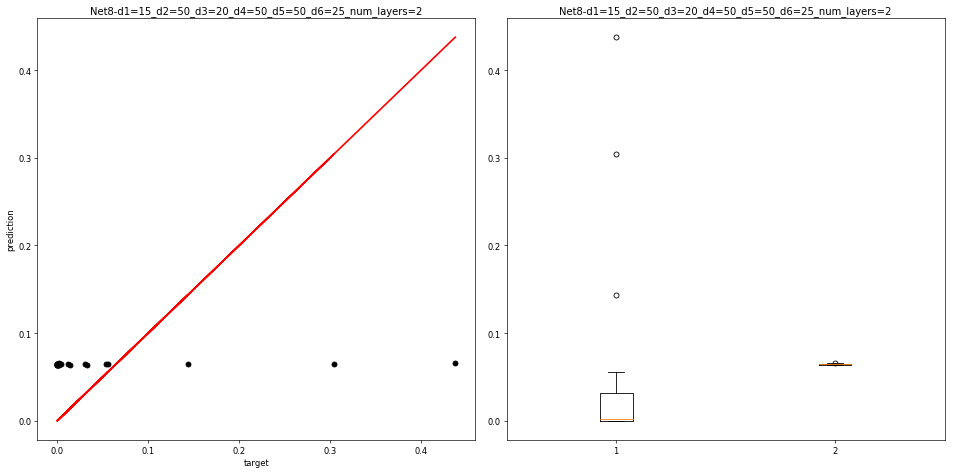

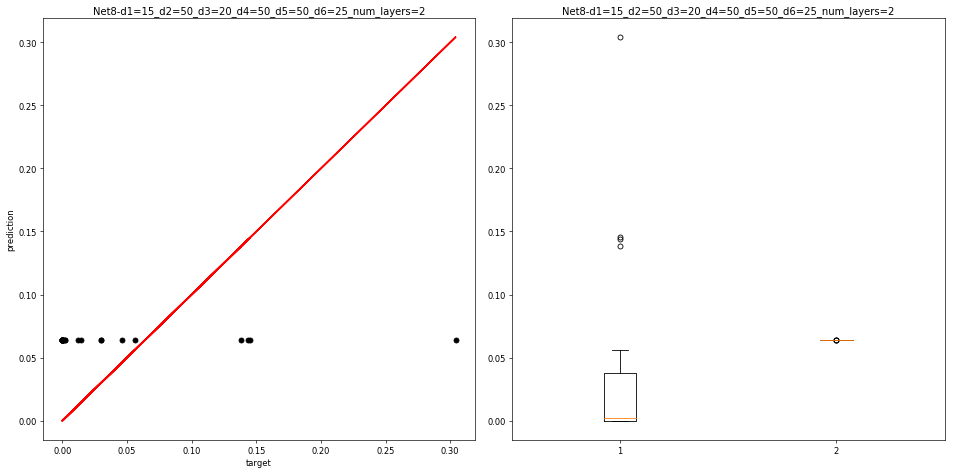

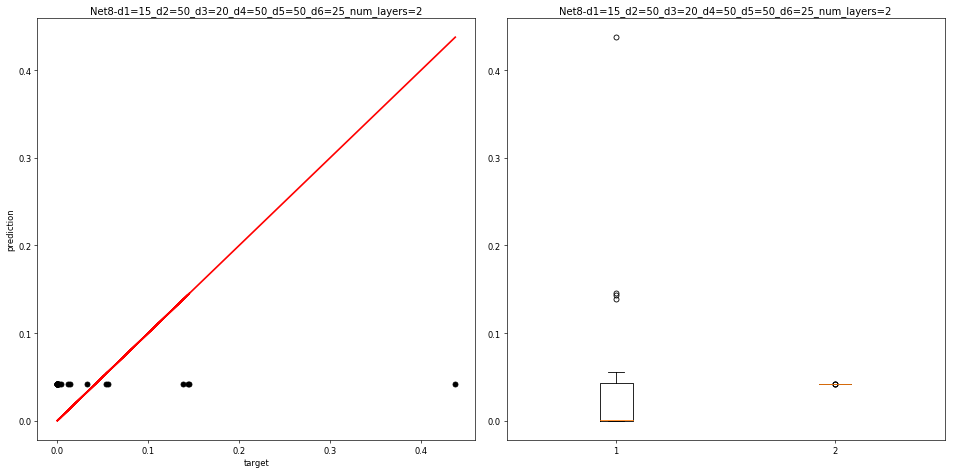

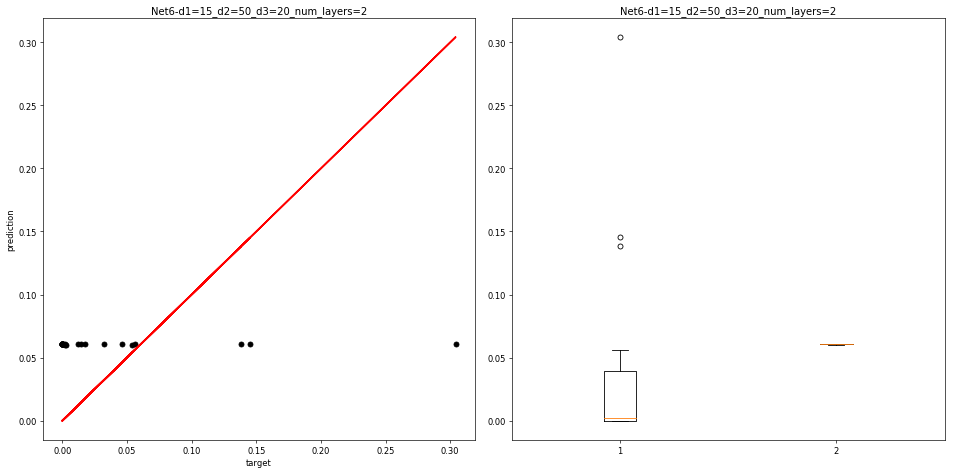

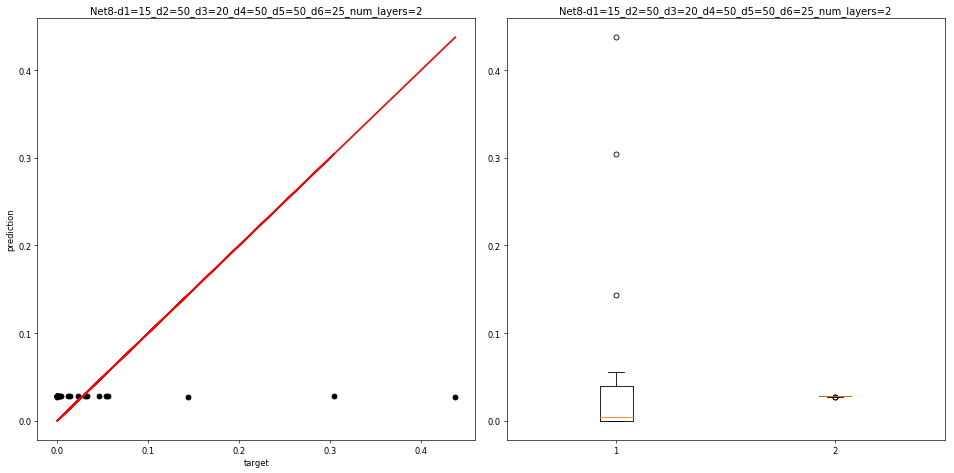

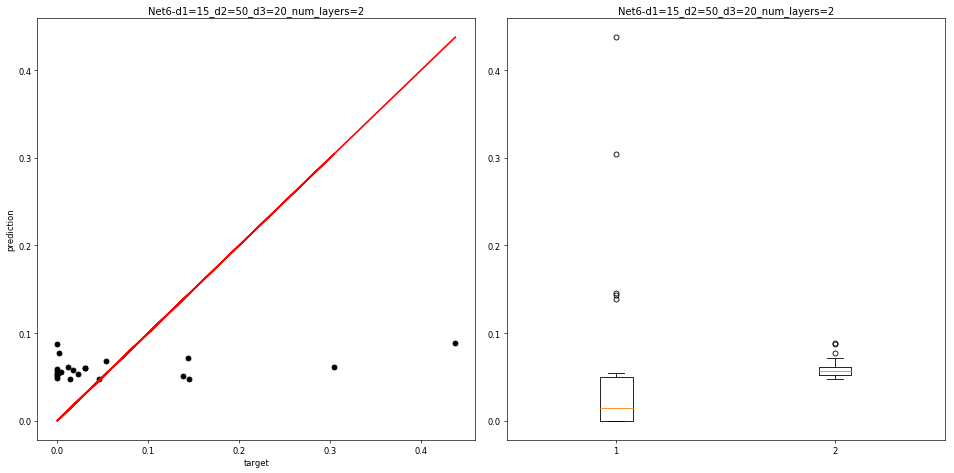

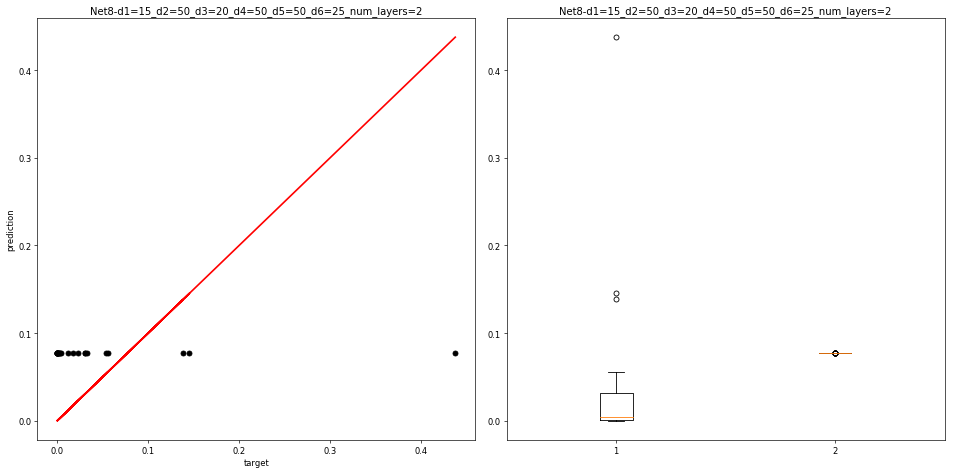

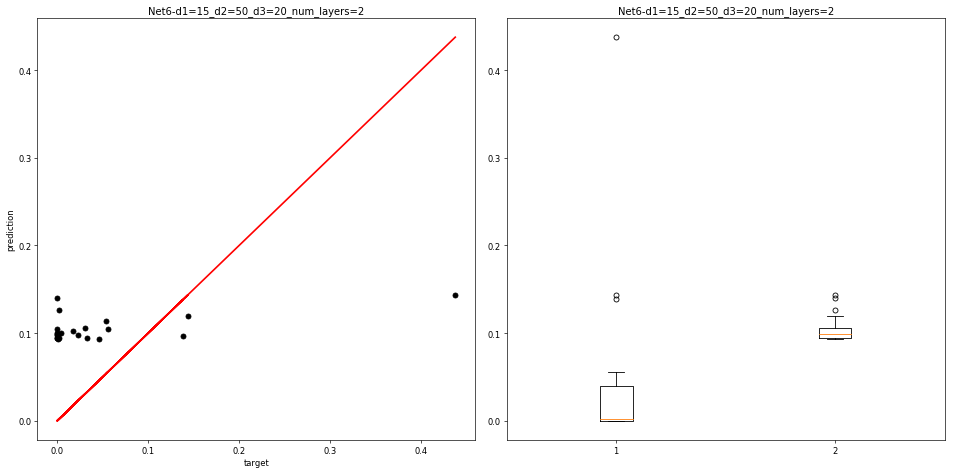

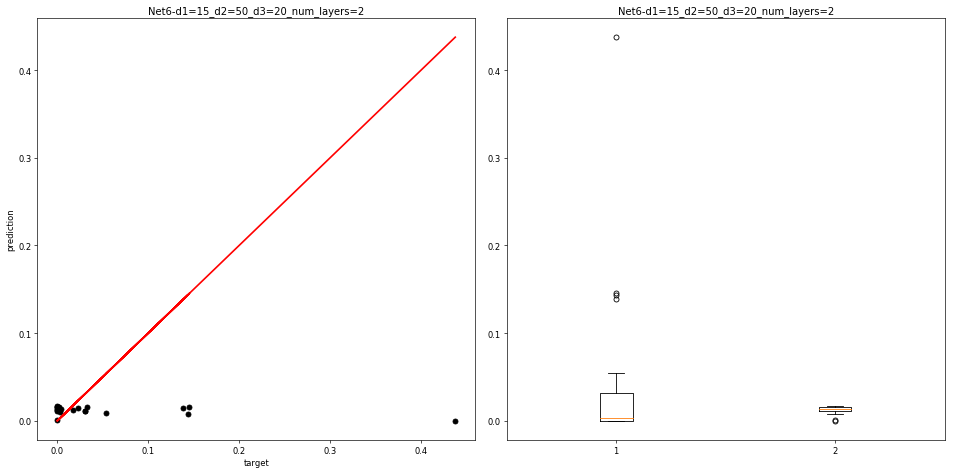

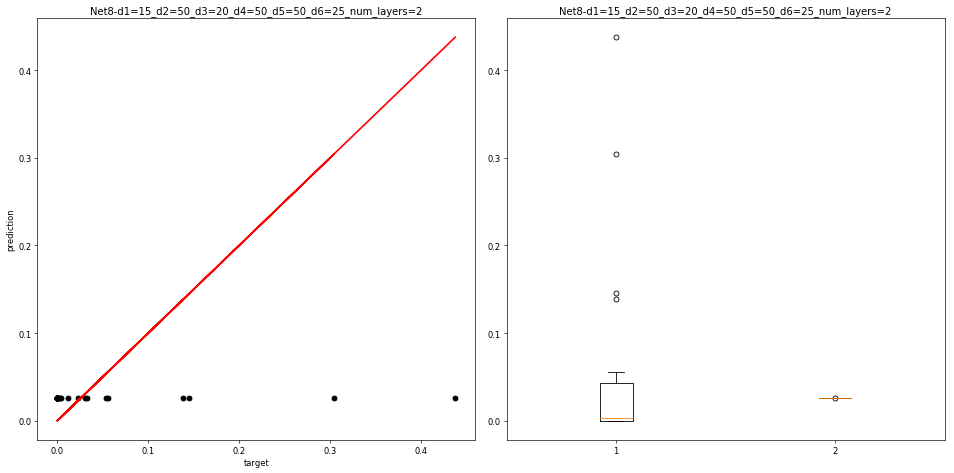

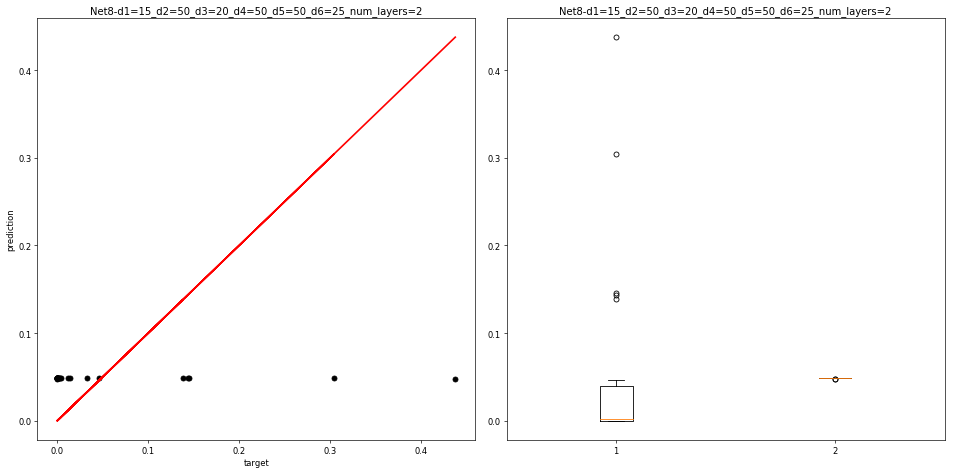

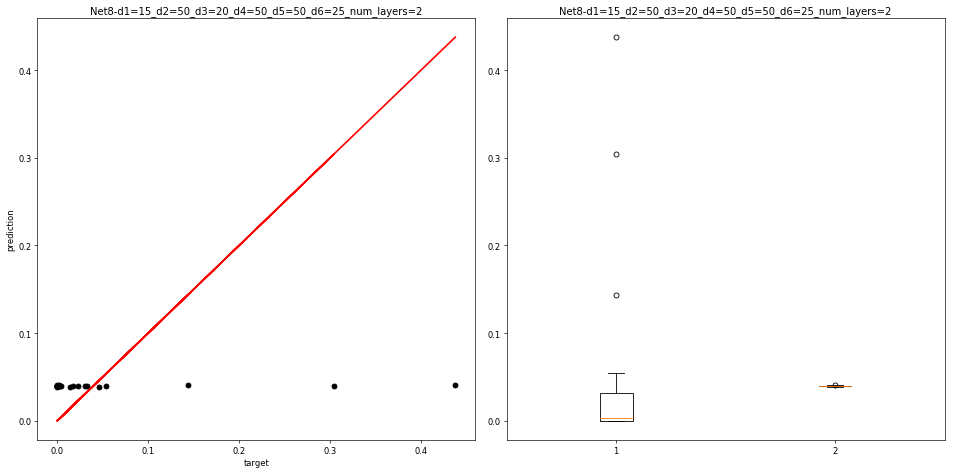

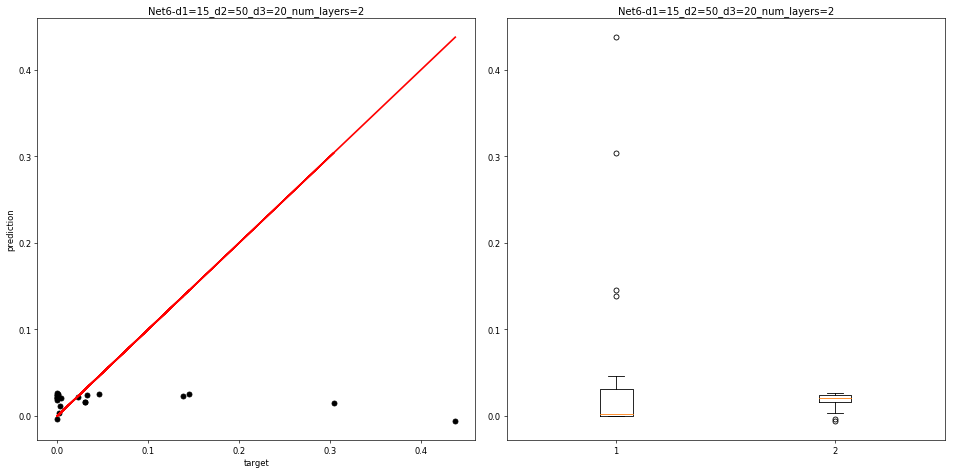

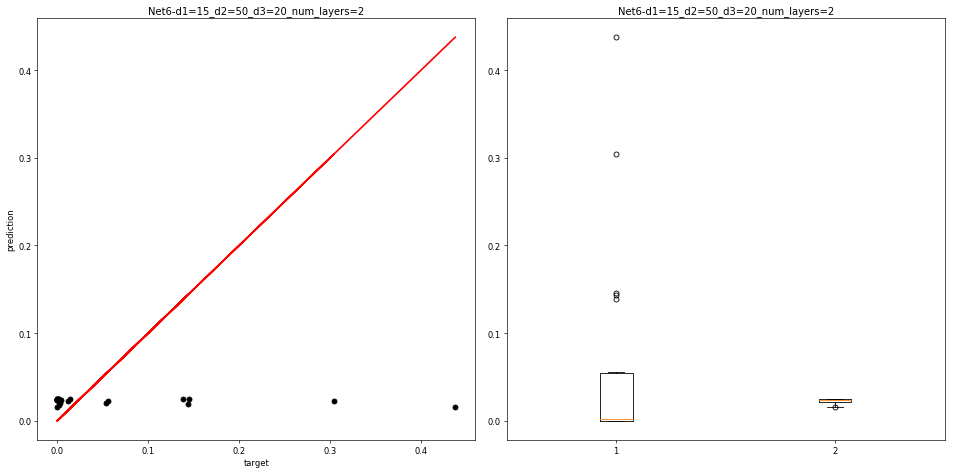

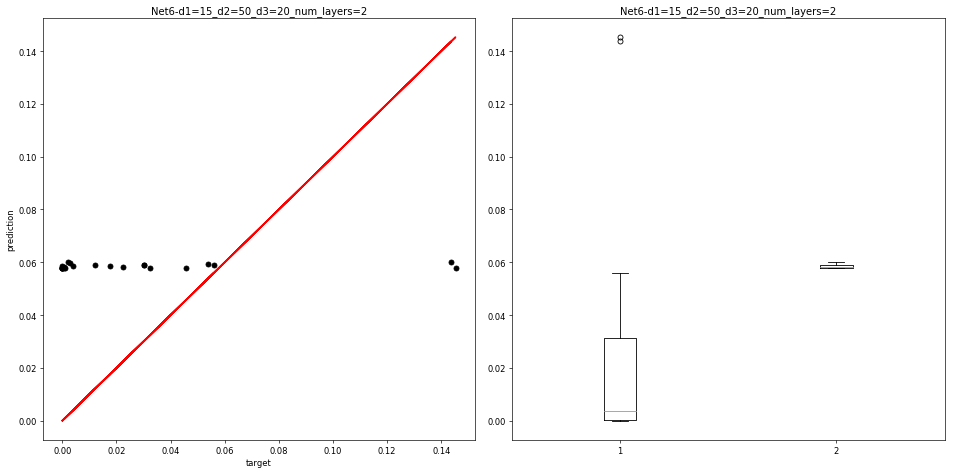

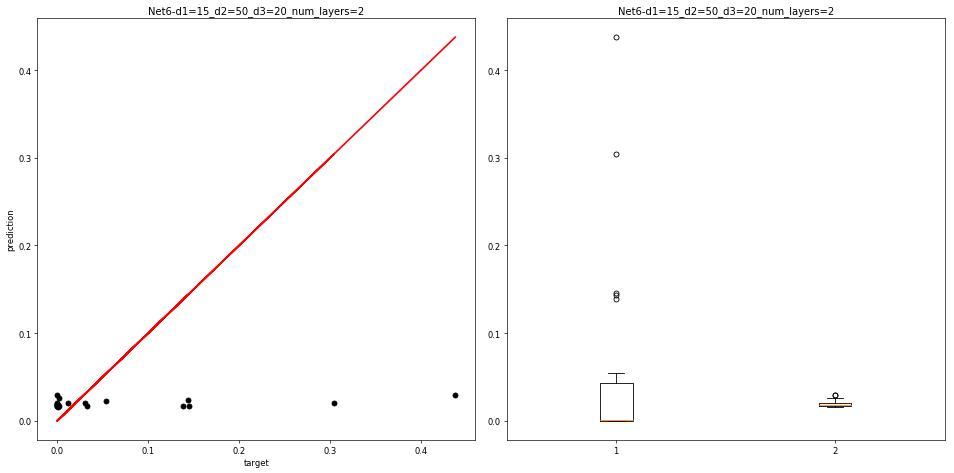

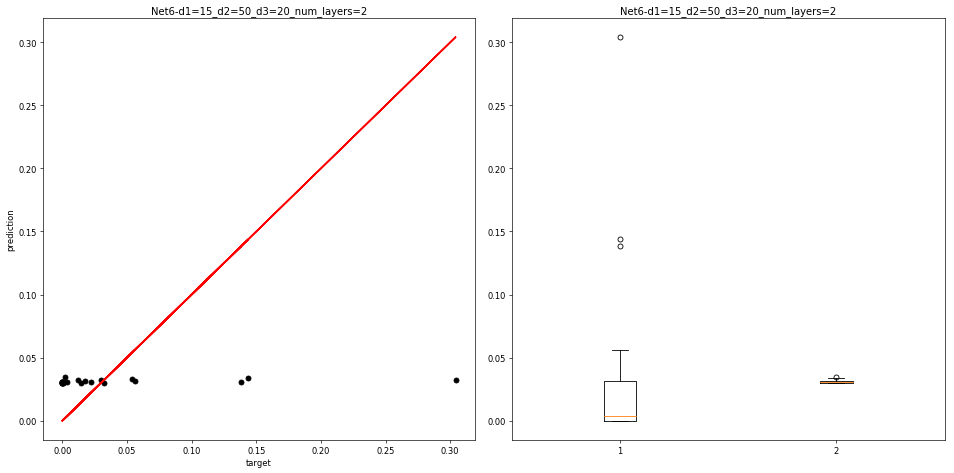

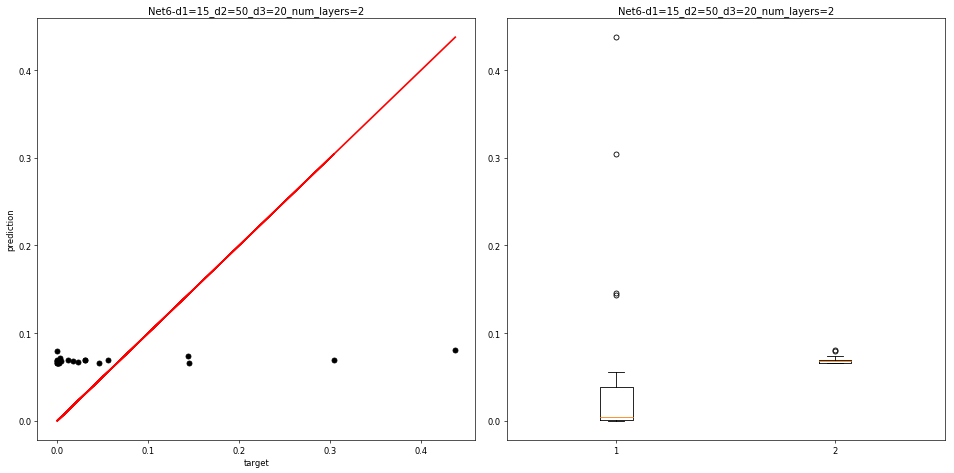

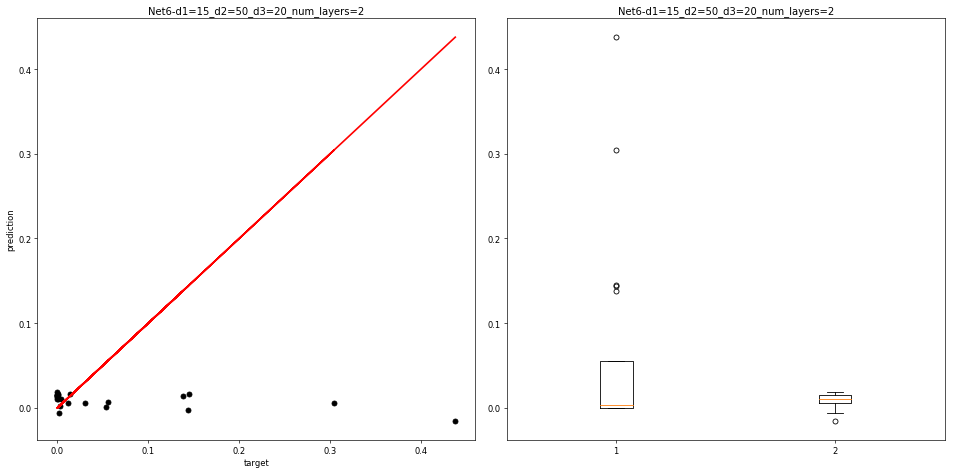

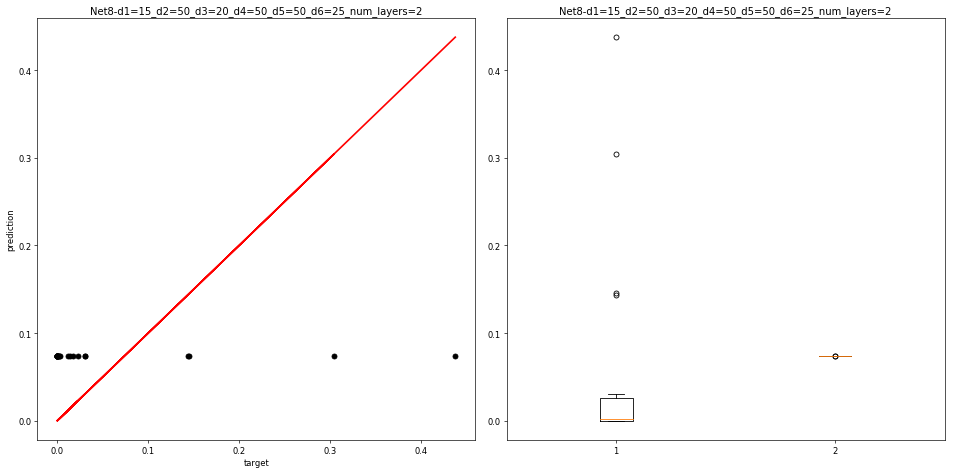

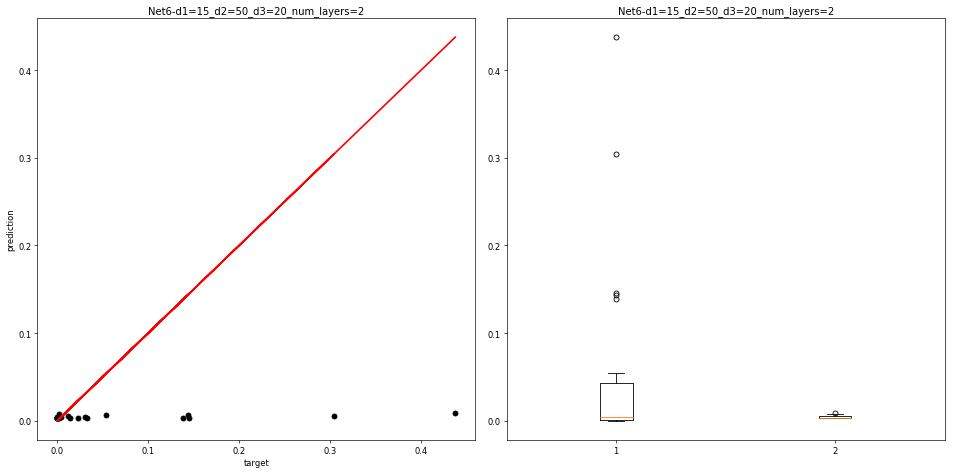

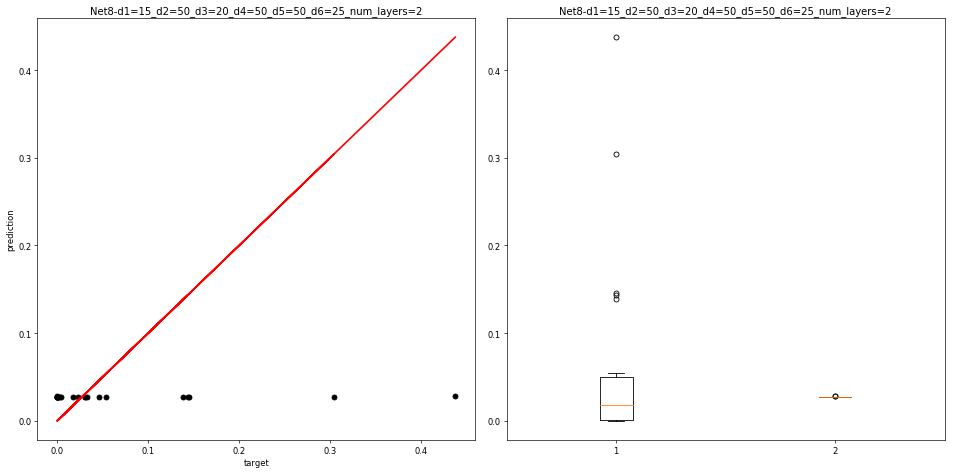

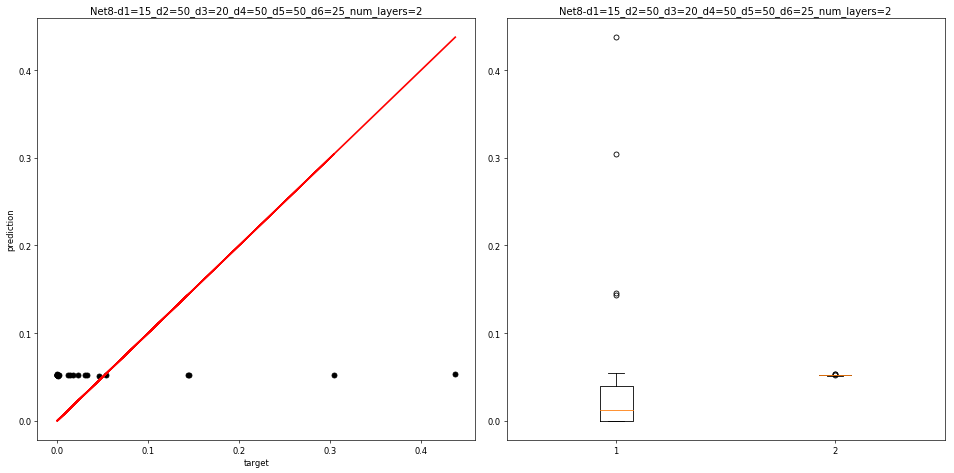

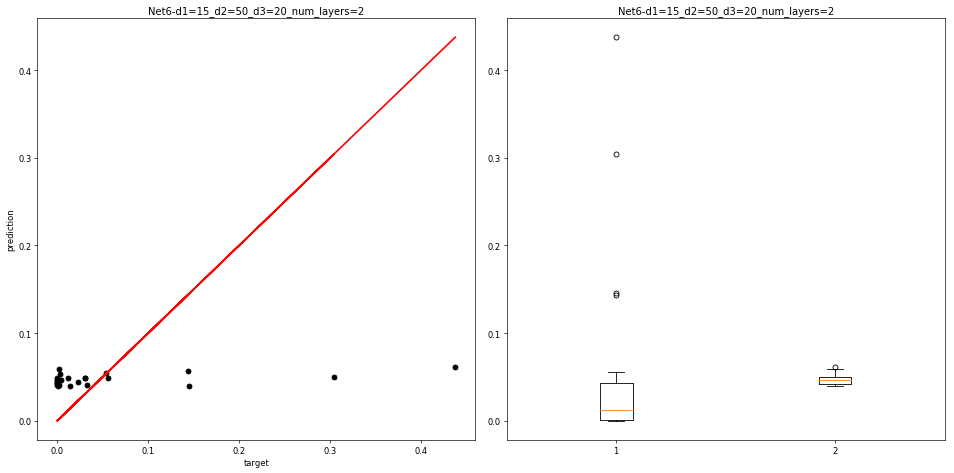

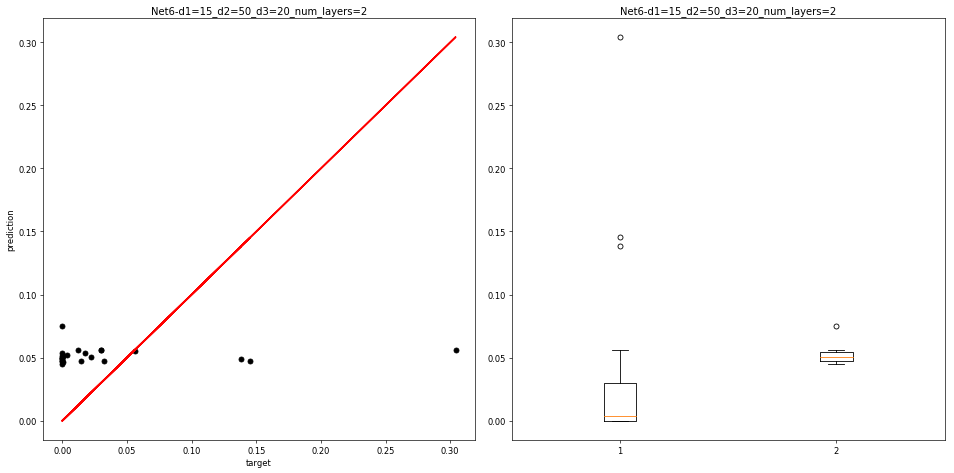

In [8]:
dname='../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_nd.pickle'
for s in range(100):
    print(s)
    experimentBlock(dname, epochs=4, seed=s)
    reporting(res_dict)
"""
8
12
17
19
26
29
35<--
40
"""

/home/pau/.pyenv/versions/3.6.7/envs/gnn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:126: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


,GTavg,GTmax,GTmed,GTmin,GTsd,PREDavg,PREDmax,PREDmed,PREDmin,PREDsd,dataset,epochs,hyperparams,neg vals,nrmse,time
Net6-d1=15_d2=50_d3=20_num_layers=2,0.232583,0.628079,0.246305,0,0.628079,0.170232,0.170291,0.170235,0.170176,0.000114232,ws_30_3_0_1_nb,100,d1=15_d2=50_d3=20_num_layers=2,False,0.803,0.449
Net8-d1=15_d2=50_d3=20_d4=20_d5=15_d6=10_num_layers=2,0.208069,0.628079,0.133005,0,0.628079,0.227378,0.227378,0.227378,0.227378,0,ws_30_3_0_1_nb,100,d1=15_d2=50_d3=20_d4=20_d5=15_d6=10_num_layers=2,False,0.873,0.499
Net8-d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,0.212175,0.413793,0.246305,0,0.413793,0.216808,0.216808,0.216808,0.216808,2.08616e-07,ws_30_3_0_1_nb,100,d1=15_d2=50_d3=20_d4=50_d5=50_d6=25_num_layers=2,False,0.63,0.513


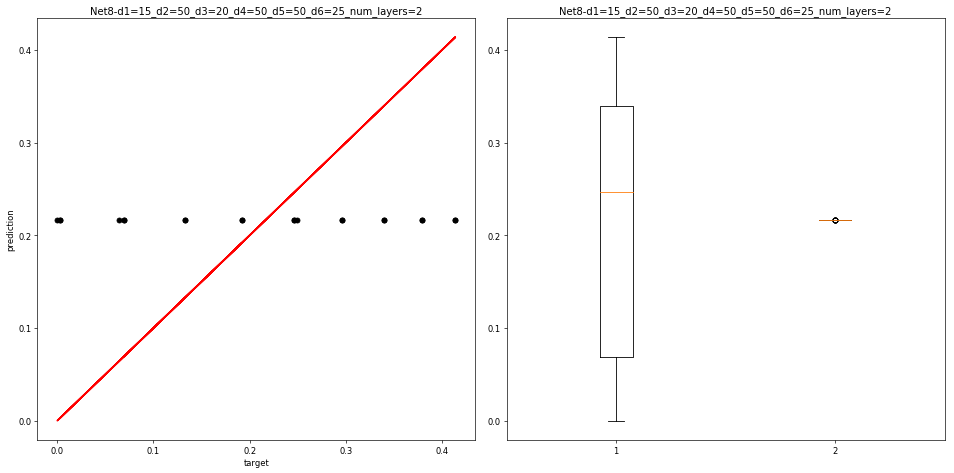

In [41]:
dname='../datasets/precomputed-pytorchg-betweenness_old/ws_30_3_0_1_nb.pickle'
experimentBlock(dname)
reporting(res_dict)